## Описание датасета

Аннотация: С помощью CVS были получены изображения сортов изюма Кечимен и Бесни. Всего было использовано 900 видов изюма, в том числе 450 из обоих сортов, и были выделены 7 морфологических признаков.

* **Area** - Площадь

* **MajorAxisLength** - Длина по основной оси

* **MinorAxisLength** - Длина по второстепенной оси

* **Eccentricity** - Эксцентричность (нецентрированность, несимметричность относительно центра.)

* **ConvexArea** - Площадь поверхности

* **Extent** - Протяженность

* **Perimeter** - Периметр

* **Class** - Тип изюма (Kecimen (Кечимен) and Besni (беснийский) raisin)

## Первичная обработка данных

Размер датасета: (900, 8)

Первые строки:
    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorA

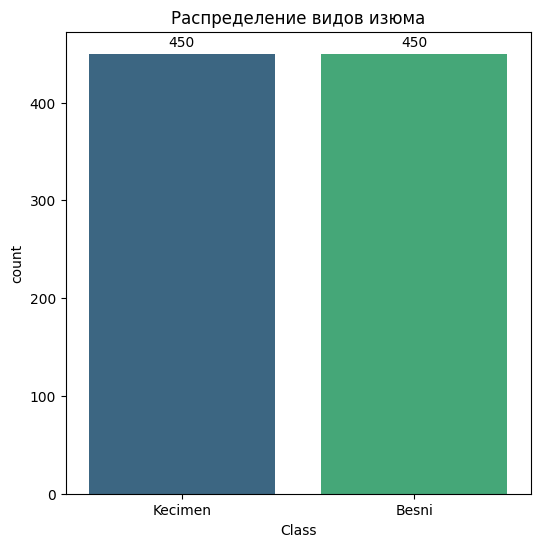

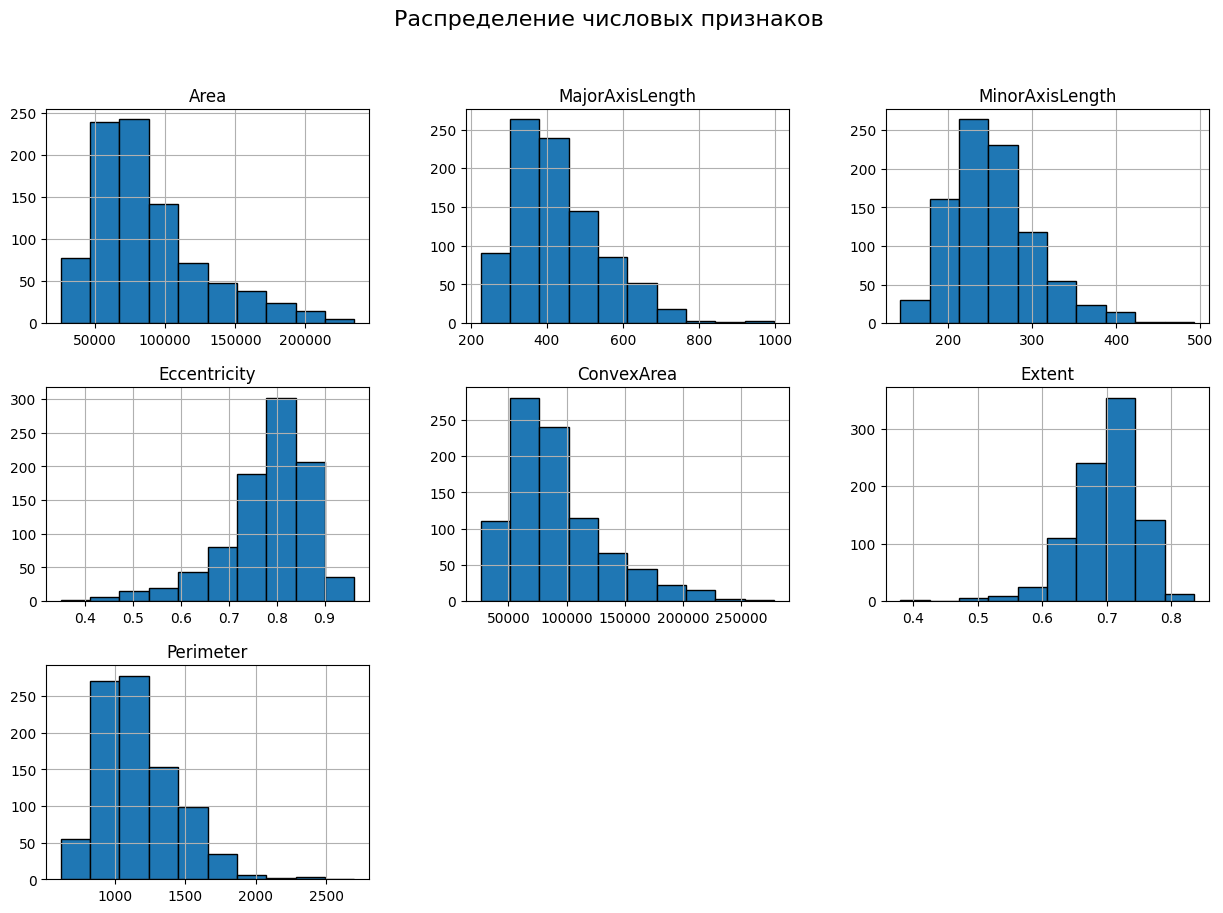

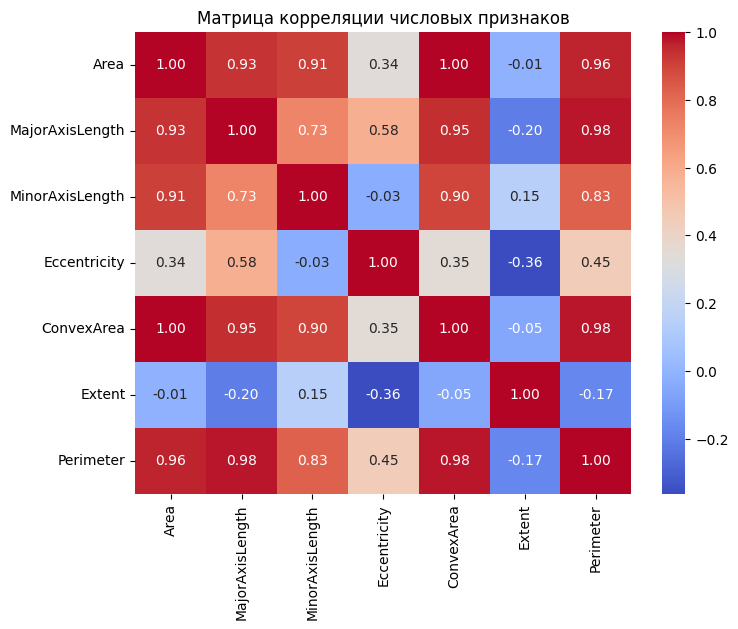

In [199]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis, normaltest
import seaborn as sns
import numpy as np

df = pd.read_csv("Raisin_Dataset.csv", sep=",")

df = df.fillna(df.mean(numeric_only=True))

num_cols = df.drop("Class", axis=1).columns

print("Размер датасета:", df.shape)
print("\nПервые строки:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписание признаков:")
print(df.describe())
print("\nКоличество пропусков:")
print(df.isnull().sum())

data = {
    'Параметр': [],
    'Асимметрия': [],
    'Эксцесс': []
}

for col in num_cols:
    skew_val = skew(df[col].dropna())
    kurt_val = kurtosis(df[col].dropna())
    data['Параметр'].append(col)
    data['Асимметрия'].append(skew_val)
    data['Эксцесс'].append(kurt_val)

summary_df = pd.DataFrame(data)
print(summary_df)

# === 5. Проверка нормальности распределения (тест Шапиро–Уилка) ===

print("\nПроверка нормальности распределения (тест Д’Агостино-Пирсона):")
for col in num_cols:
    stat, p = normaltest(df[col].dropna())
    print(f"{col}: статистика={stat:.4f}, p-значение={p:.4f}")
    if p > 0.05:
        print(" → распределение близко к нормальному\n")
    else:
        print(" → распределение отличается от нормального\n")


plt.figure(figsize=(6, 6))
ax = sns.countplot(x="Class", hue="Class", data=df, palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title("Распределение видов изюма")
plt.show()

count_of_bins = int(1 + 3.322*math.log10(df.shape[0]))

# --- Числовые признаки ---
df[num_cols].hist(bins=count_of_bins, figsize=(15, 10), edgecolor="black")
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.show()

# === 7. Матрица корреляции ===
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции числовых признаков")
plt.show()

По матрице корреляции видно, что площать и периметр сильно коррелируют с длинами и площадью поверхности. Поэтому из всех переменных предикторов оставим только площадь Area и будем работать с оставшимися данными.

## Дискриптивный анализ после удаления коррелируемых признаков

Размер датасета: (900, 4)

Первые строки:
    Area  Eccentricity    Extent    Class
0  87524      0.819738  0.758651  Kecimen
1  75166      0.801805  0.684130  Kecimen
2  90856      0.798354  0.637613  Kecimen
3  45928      0.684989  0.699599  Kecimen
4  79408      0.564011  0.792772  Kecimen

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          900 non-null    int64  
 1   Eccentricity  900 non-null    float64
 2   Extent        900 non-null    float64
 3   Class         900 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 28.3+ KB
None

Описание признаков:
                Area  Eccentricity      Extent
count     900.000000    900.000000  900.000000
mean    87804.127778      0.781542    0.699508
std     39002.111390      0.090318    0.053468
min     25387.000000      0.348730    0.37985

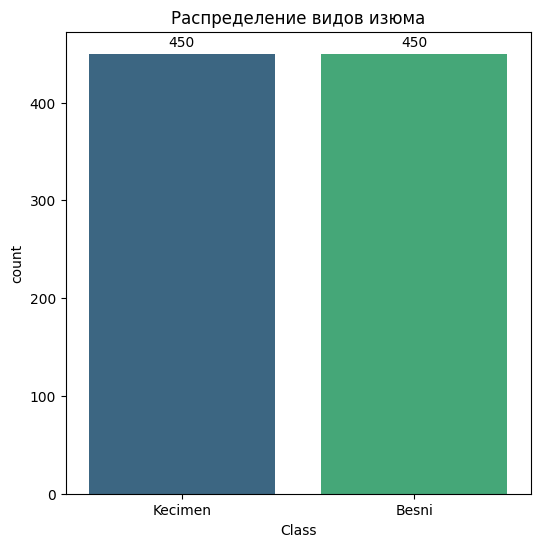

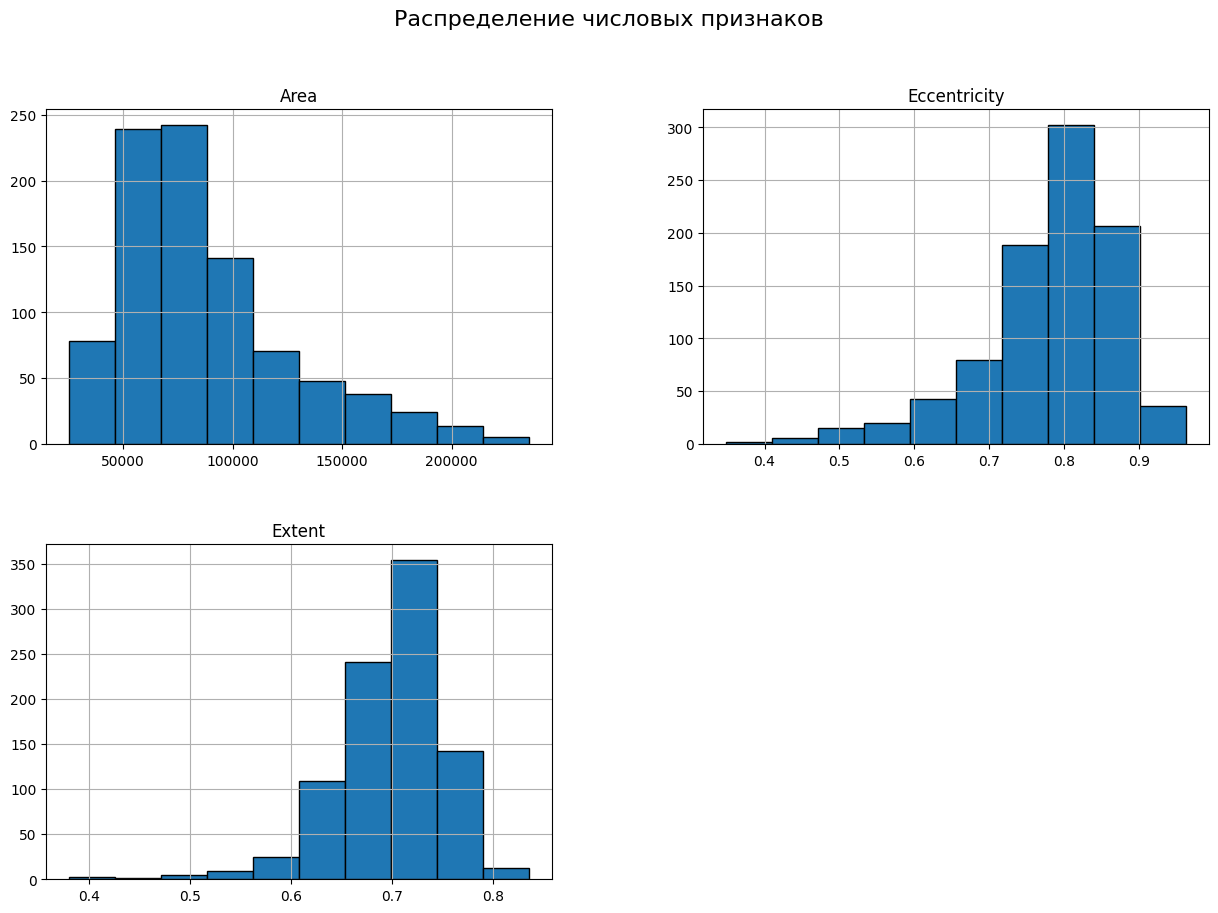

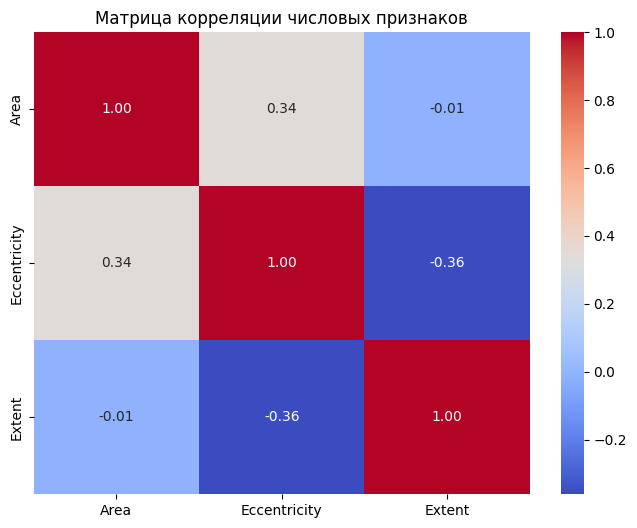

In [200]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew, kurtosis, normaltest
import seaborn as sns
import numpy as np

df = pd.read_csv("Raisin_essential.csv", sep=";")

df = df.fillna(df.mean(numeric_only=True))

num_cols = df.drop("Class", axis=1).columns

print("Размер датасета:", df.shape)
print("\nПервые строки:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписание признаков:")
print(df.describe())
print("\nКоличество пропусков:")
print(df.isnull().sum())

data = {
    'Параметр': [],
    'Асимметрия': [],
    'Эксцесс': []
}

for col in num_cols:
    skew_val = skew(df[col].dropna())
    kurt_val = kurtosis(df[col].dropna())
    data['Параметр'].append(col)
    data['Асимметрия'].append(skew_val)
    data['Эксцесс'].append(kurt_val)

summary_df = pd.DataFrame(data)
print(summary_df)

# === 5. Проверка нормальности распределения (тест Шапиро–Уилка) ===

print("\nПроверка нормальности распределения (тест Д’Агостино-Пирсона):")
for col in num_cols:
    stat, p = normaltest(df[col].dropna())
    print(f"{col}: статистика={stat:.4f}, p-значение={p:.4f}")
    if p > 0.05:
        print(" → распределение близко к нормальному\n")
    else:
        print(" → распределение отличается от нормального\n")


plt.figure(figsize=(6, 6))
ax = sns.countplot(x="Class", hue="Class", data=df, palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=3)
plt.title("Распределение видов изюма")
plt.show()

count_of_bins = int(1 + 3.322*math.log10(df.shape[0]))

# --- Числовые признаки ---
df[num_cols].hist(bins=count_of_bins, figsize=(15, 10), edgecolor="black")
plt.suptitle("Распределение числовых признаков", fontsize=16)
plt.show()

# === 7. Матрица корреляции ===
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Матрица корреляции числовых признаков")
plt.show()

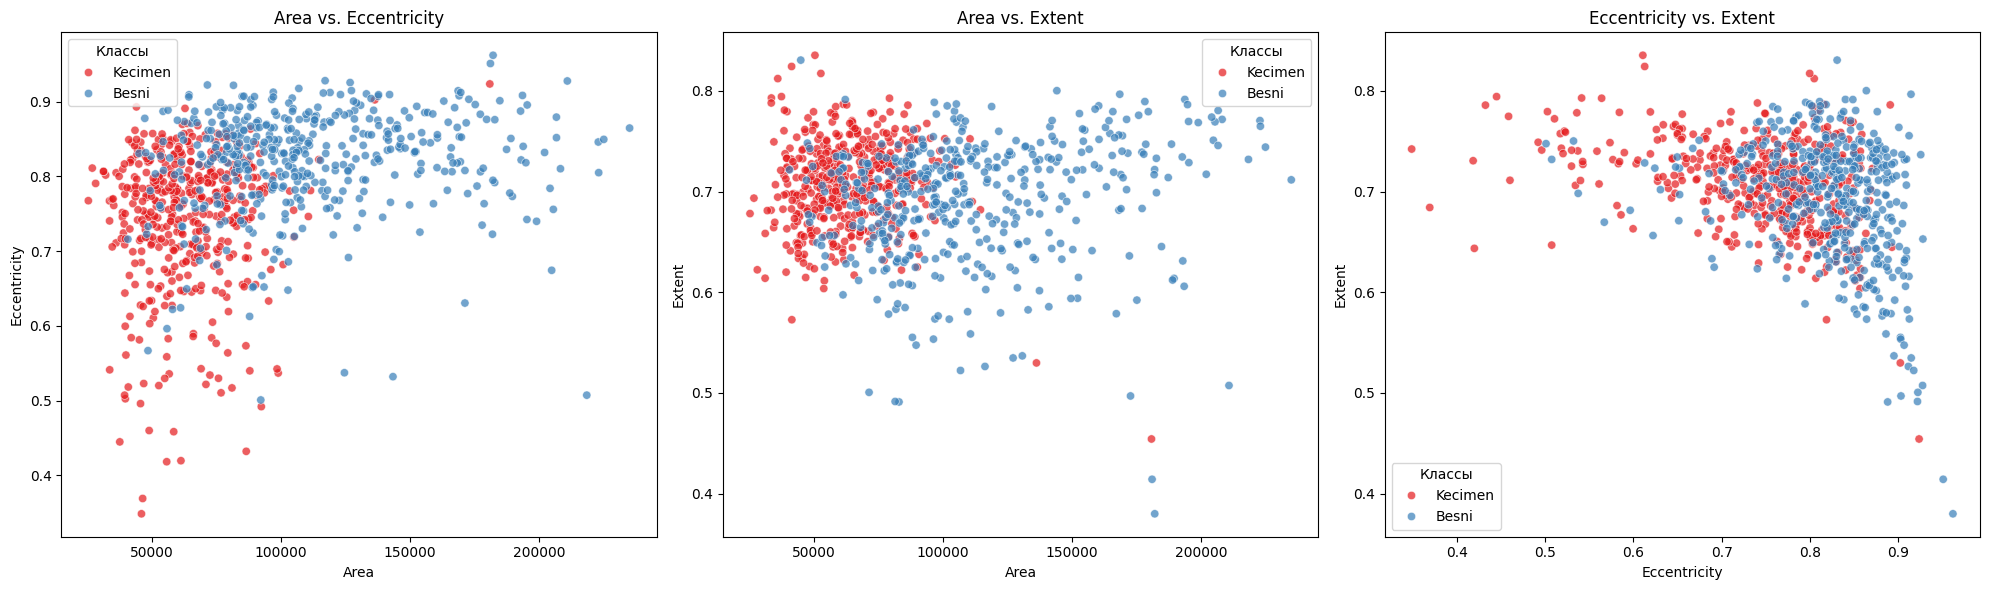

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Параметры для графиков
pairs = [
    ('Area', 'Eccentricity'),
    ('Area', 'Extent'),
    ('Eccentricity', 'Extent')
]
class_col = 'Class'

# Создаем фигуру с 3 подграфиками в одной строке
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (feature_x, feature_y) in enumerate(pairs):
    sns.scatterplot(
        data=df, x=feature_x, y=feature_y, hue=class_col, palette='Set1', alpha=0.7,
        ax=axes[i]
    )
    axes[i].set_title(f'{feature_x} vs. {feature_y}')
    axes[i].set_xlabel(feature_x)
    axes[i].set_ylabel(feature_y)
    axes[i].legend(title='Классы')

plt.tight_layout()
plt.show()


## Стандартизация переменных

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print(df[num_cols].head)

<bound method NDFrame.head of          Area  Eccentricity    Extent
0   -0.007186      0.423142  1.106743
1   -0.324217      0.224476 -0.287777
2    0.078292      0.186239 -1.158250
3   -1.074286     -1.069623  0.001711
4   -0.215393     -2.409827  1.745259
..        ...           ...       ...
895 -0.116882      0.395714 -0.574773
896 -0.011650      0.300071 -1.179518
897  0.304072     -0.663114  0.778289
898  0.146711      0.711173 -0.761804
899 -0.056314      1.393660 -1.262909

[900 rows x 3 columns]>


## Наивный Байесовский

Отчет классификации GaussianNB:
               precision    recall  f1-score   support

       Besni       0.84      0.78      0.81        86
     Kecimen       0.81      0.86      0.84        94

    accuracy                           0.82       180
   macro avg       0.82      0.82      0.82       180
weighted avg       0.82      0.82      0.82       180

ROC-AUC GaussianNB: 0.9140277090549234

Отчет классификации MultinomialNB:
               precision    recall  f1-score   support

       Besni       0.82      0.87      0.85        86
     Kecimen       0.88      0.83      0.85        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

ROC-AUC MultinomialNB: 0.9111825828797625

Отчет классификации ComplementNB:
               precision    recall  f1-score   support

       Besni       0.87      0.78      0.82        86
     Kecimen       0.82      0.89      0.85       

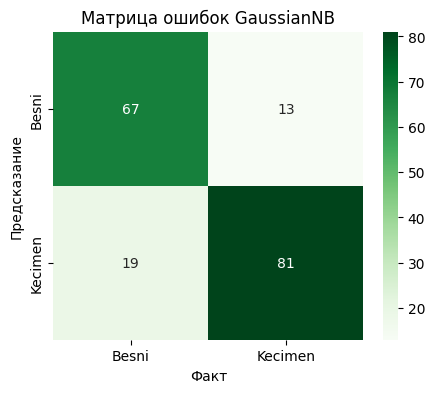

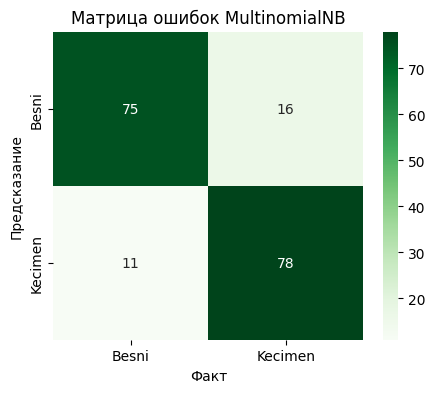

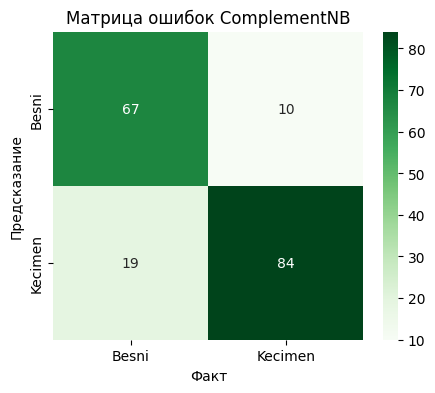

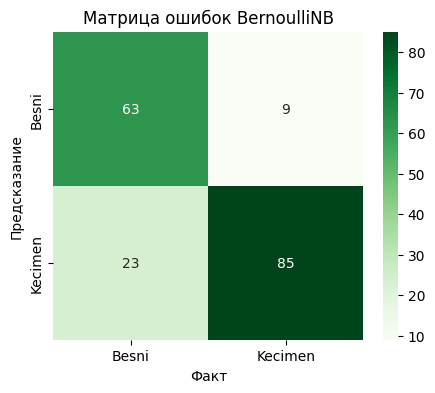

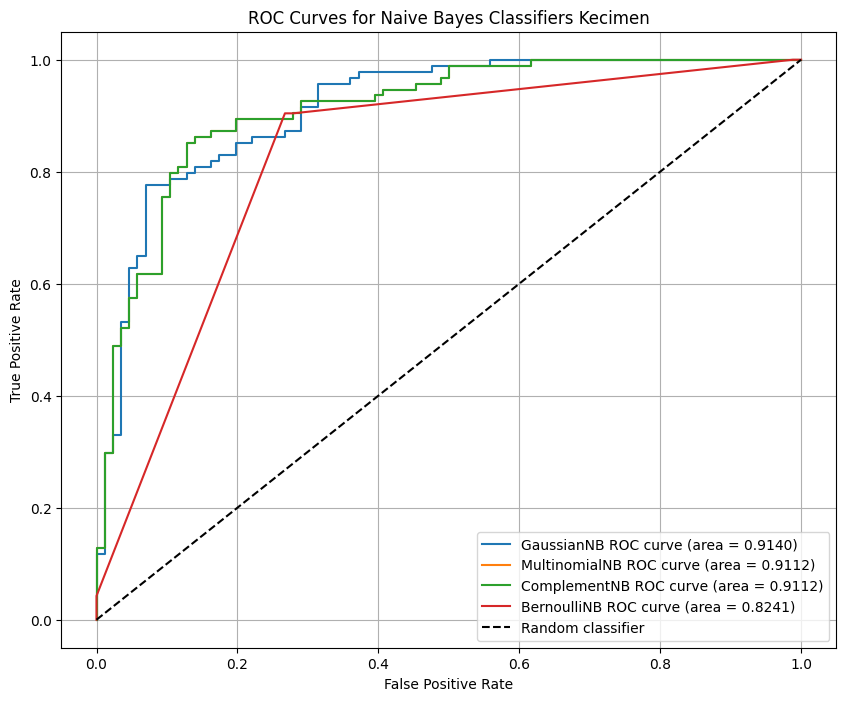

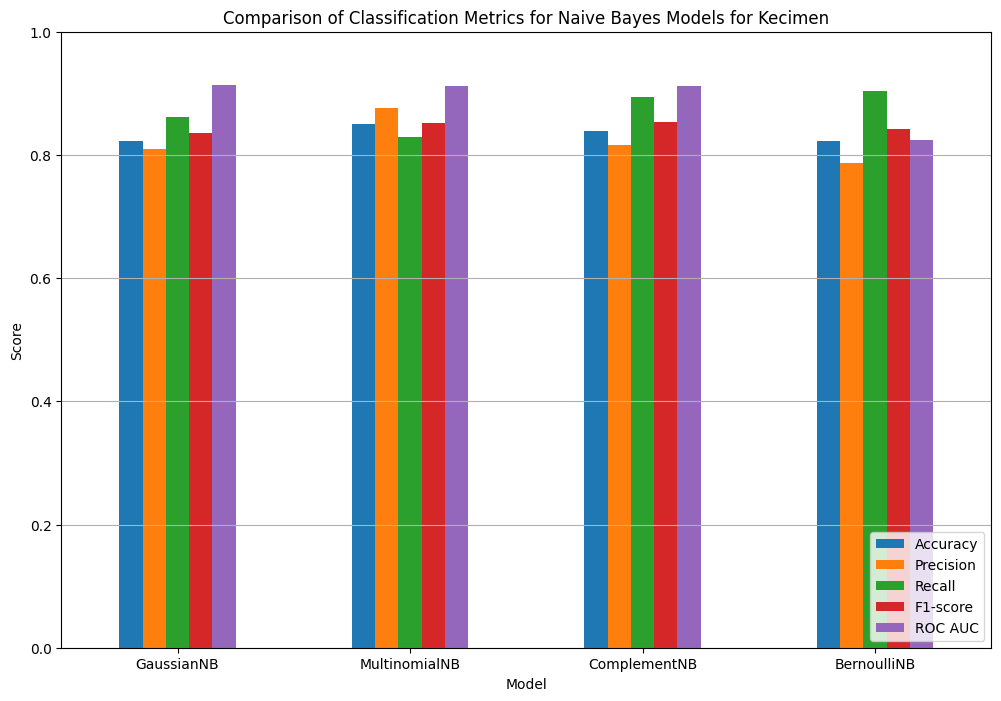

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler

target = 'Class'

X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# GaussianNB
gauss_nb_clf = GaussianNB()
gauss_nb_clf.fit(X_train, y_train)
gauss_nb_clf_pred_res = gauss_nb_clf.predict(X_test)
gauss_nb_proba = gauss_nb_clf.predict_proba(X_test)[:, 1]

# Вывод отчёта классификации
report = classification_report(y_test, gauss_nb_clf_pred_res)
print("Отчет классификации GaussianNB:\n", report)
print("ROC-AUC GaussianNB:", roc_auc_score(y_test, gauss_nb_proba))
print()

matrix = confusion_matrix(y_test, gauss_nb_clf_pred_res)
matrix_custom = matrix.T 
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Besni', 'Kecimen'], 
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок GaussianNB")
plt.xlabel("Факт")
plt.ylabel("Предсказание")

# Создаем копию данных и нормализуем их
X_normalized = X.copy()
scaler = MinMaxScaler()
X_normalized_scaled = scaler.fit_transform(X_normalized)
X_normalized = pd.DataFrame(X_normalized_scaled, columns=X.columns, index=X.index)

# Разделяем нормализованные данные
X_train_norm, X_test_norm, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

# MultinomialNB
mn_nb_clf = MultinomialNB()
mn_nb_clf.fit(X_train_norm, y_train)
mn_nb_clf_pred_res = mn_nb_clf.predict(X_test_norm)
mn_nb_proba = mn_nb_clf.predict_proba(X_test_norm)[:, 1]

# Вывод отчёта классификации
report = classification_report(y_test, mn_nb_clf_pred_res)
print("Отчет классификации MultinomialNB:\n", report)
print("ROC-AUC MultinomialNB:", roc_auc_score(y_test, mn_nb_proba))
print()

matrix = confusion_matrix(y_test, mn_nb_clf_pred_res)
matrix_custom = matrix.T 
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Besni', 'Kecimen'], 
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок MultinomialNB")
plt.xlabel("Факт")
plt.ylabel("Предсказание")

# ComplementNB
comp_nb_clf = ComplementNB()
comp_nb_clf.fit(X_train_norm, y_train)
comp_nb_clf_pred_res = comp_nb_clf.predict(X_test_norm)
comp_nb_proba = comp_nb_clf.predict_proba(X_test_norm)[:, 1]

print("Отчет классификации ComplementNB:\n", classification_report(y_test, comp_nb_clf_pred_res))
print("ROC-AUC ComplementNB:", roc_auc_score(y_test, comp_nb_proba))
print()

matrix = confusion_matrix(y_test, comp_nb_clf_pred_res)
matrix_custom = matrix.T 
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Besni', 'Kecimen'], 
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок ComplementNB")
plt.xlabel("Факт")
plt.ylabel("Предсказание")

# BernoulliNB
bernoulli_nb_clf = BernoulliNB(binarize=0.3) # лучший порог выявил экспериментально
bernoulli_nb_clf.fit(X_train_norm, y_train)
bernoulli_nb_pred_res = bernoulli_nb_clf.predict(X_test_norm)
bernoulli_nb_proba = bernoulli_nb_clf.predict_proba(X_test_norm)[:, 1]

print("Отчет классификации BernoulliNB:\n", classification_report(y_test, bernoulli_nb_pred_res))
print("ROC-AUC BernoulliNB:", roc_auc_score(y_test, bernoulli_nb_proba))

matrix = confusion_matrix(y_test, bernoulli_nb_pred_res)
matrix_custom = matrix.T 
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Besni', 'Kecimen'], 
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок BernoulliNB")
plt.xlabel("Факт")
plt.ylabel("Предсказание")

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# Собираем результаты моделей в словарь
models = {
    'GaussianNB': (gauss_nb_clf_pred_res, gauss_nb_proba),
    'MultinomialNB': (mn_nb_clf_pred_res, mn_nb_proba),
    'ComplementNB': (comp_nb_clf_pred_res, comp_nb_proba),
    'BernoulliNB': (bernoulli_nb_pred_res, bernoulli_nb_proba)
}

# Подготавливаем данные для ROC
plt.figure(figsize=(10, 8))
for name, (pred, prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob, pos_label='Kecimen')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC Curves for Naive Bayes Classifiers Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Подсчитываем метрики для каждой модели
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC AUC': []}
for name, (pred, prob) in models.items():
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['Recall'].append(recall_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['F1-score'].append(f1_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['ROC AUC'].append(roc_auc_score(y_test, prob))

metrics_df = pd.DataFrame(metrics).set_index('Model')

# Столбчатые диаграммы метрик
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Metrics for Naive Bayes Models for Kecimen')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()


## Дерево решений

**Описание метода**



Отчет классификации Дерева решений:
               precision    recall  f1-score   support

       Besni       0.86      0.81      0.84        86
     Kecimen       0.84      0.88      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

ROC-AUC: 0.882


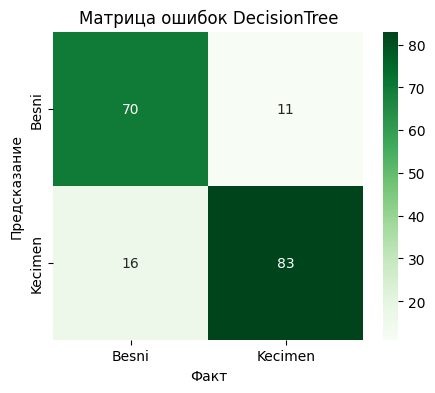

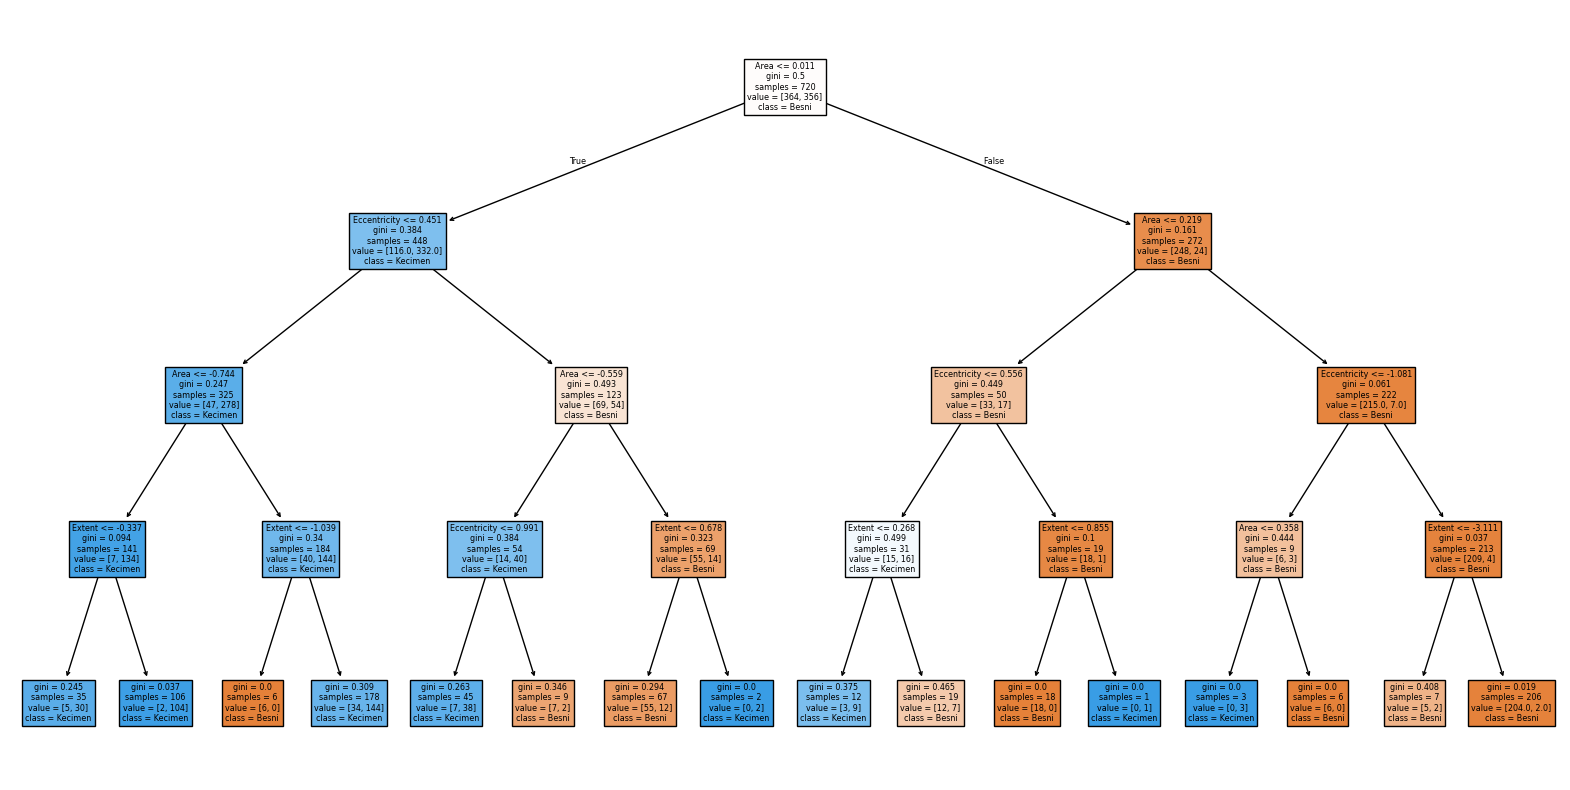

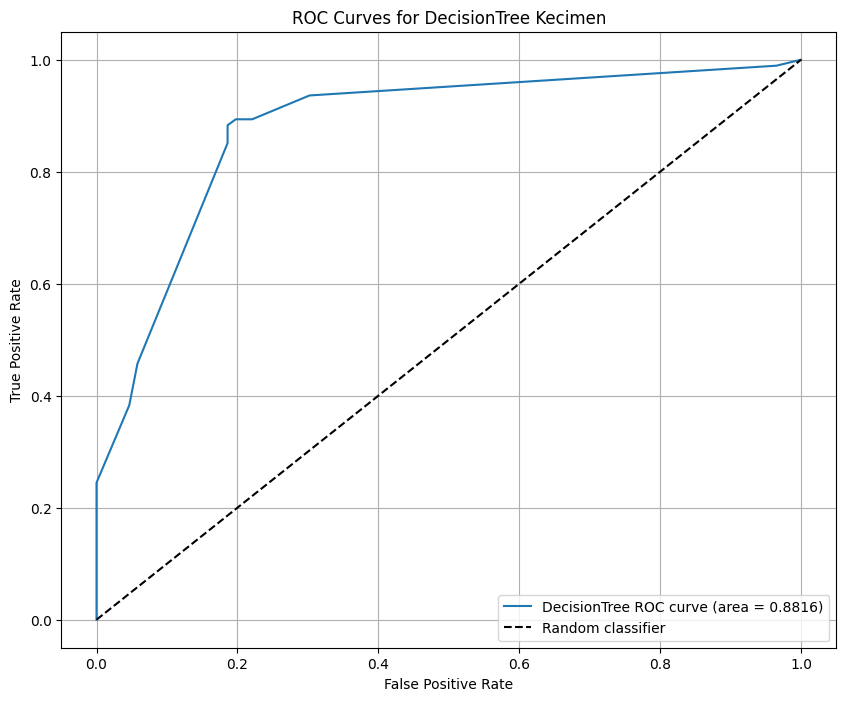

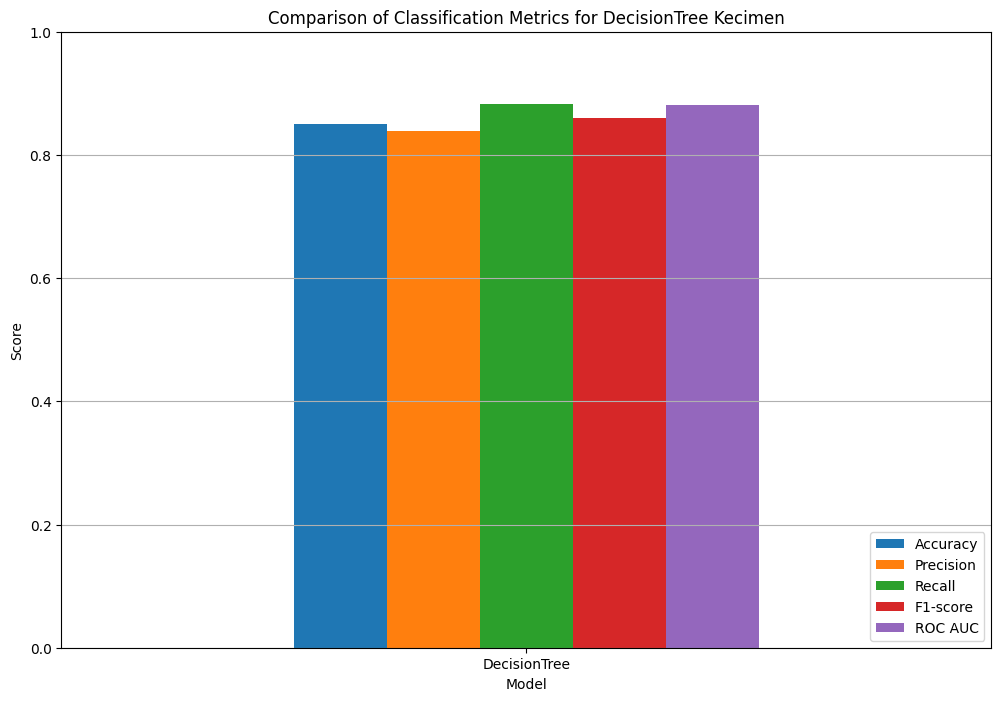

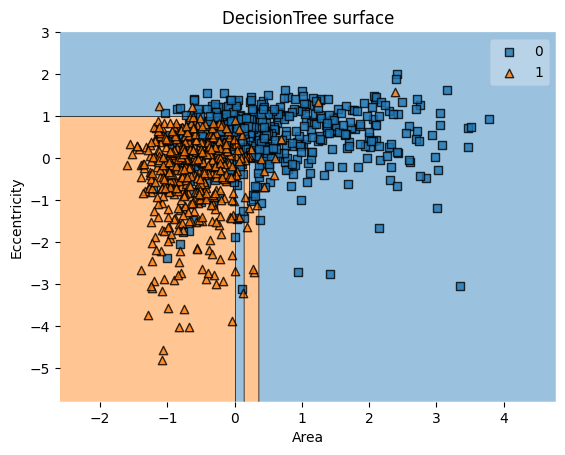

In [204]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder

# Обучаем дерево решений на тренировочных данных
model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
model.fit(X_train, y_train)

# Предсказания и вероятности на тесте
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("Отчет классификации Дерева решений:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"ROC-AUC: {roc_auc:.3f}")

matrix = confusion_matrix(y_test, y_pred)
matrix_custom = matrix.T 
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Besni', 'Kecimen'], 
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок DecisionTree")
plt.xlabel("Факт")
plt.ylabel("Предсказание")

# Визуализация дерева с помощью plot_tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Besni", "Kecimen"])
plt.show()

# Собираем результаты моделей в словарь
models = {
    'DecisionTree': (y_pred, y_proba)
}

# Подготавливаем данные для ROC
plt.figure(figsize=(10, 8))
for name, (pred, prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob, pos_label='Kecimen')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC Curves for DecisionTree Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Подсчитываем метрики для каждой модели
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC AUC': []}
for name, (pred, prob) in models.items():
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['Recall'].append(recall_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['F1-score'].append(f1_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['ROC AUC'].append(roc_auc_score(y_test, prob))

metrics_df = pd.DataFrame(metrics).set_index('Model')

# Столбчатые диаграммы метрик
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Metrics for DecisionTree Kecimen')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    # Кодируем y в целочисленные метки
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

feature_indexes = [0, 1]
title1 = 'DecisionTree surface'
decision_boundary_plot(X, y, X_train, y_train, model, feature_indexes, title1)


## LDA

Отчет классификации LDA:
               precision    recall  f1-score   support

       Besni       0.86      0.81      0.84        86
     Kecimen       0.84      0.88      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180

ROC-AUC: 0.922


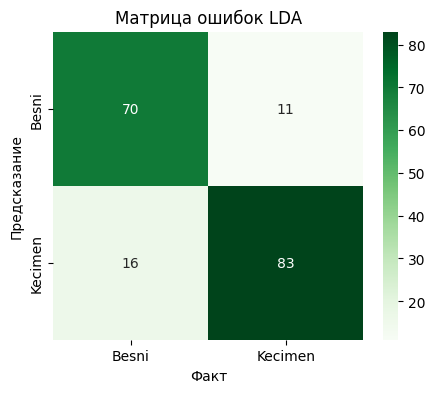

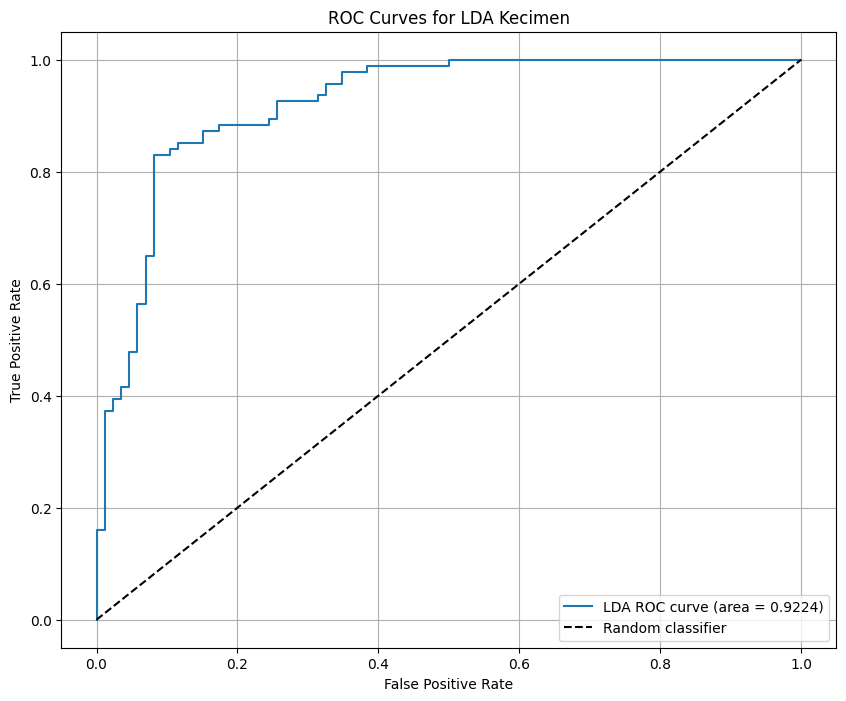

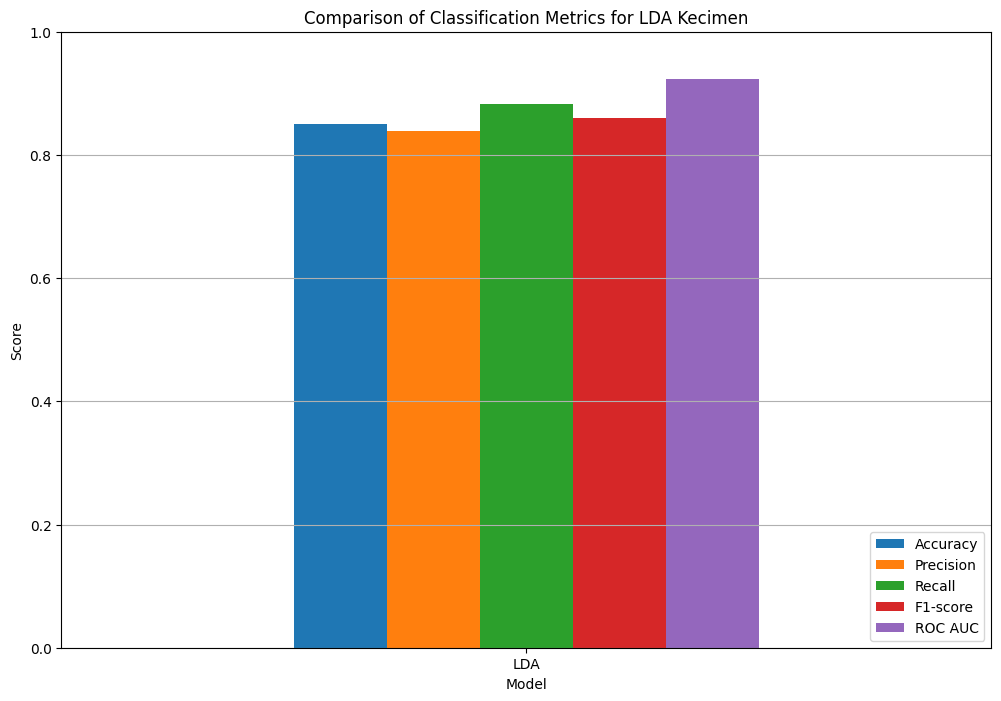

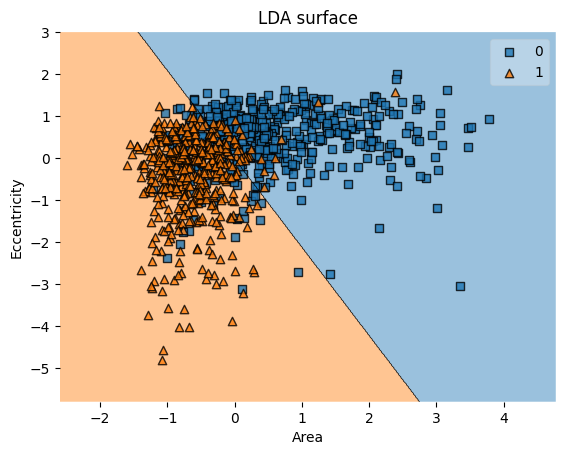

In [205]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)

# Предсказания и вероятности на тесте
y_pred = sk_lda.predict(X_test)
y_proba = sk_lda.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

print("Отчет классификации LDA:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"ROC-AUC: {roc_auc:.3f}")

matrix = confusion_matrix(y_test, y_pred)
matrix_custom = matrix.T 
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Besni', 'Kecimen'], 
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок LDA")
plt.xlabel("Факт")
plt.ylabel("Предсказание")

# Собираем результаты моделей в словарь
models = {
    'LDA': (y_pred, y_proba)
}

# Подготавливаем данные для ROC
plt.figure(figsize=(10, 8))
for name, (pred, prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob, pos_label='Kecimen')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC Curves for LDA Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Подсчитываем метрики для каждой модели
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC AUC': []}
for name, (pred, prob) in models.items():
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['Recall'].append(recall_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['F1-score'].append(f1_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['ROC AUC'].append(roc_auc_score(y_test, prob))

metrics_df = pd.DataFrame(metrics).set_index('Model')

# Столбчатые диаграммы метрик
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Metrics for LDA Kecimen')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    # Кодируем y в целочисленные метки
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

feature_indexes = [0, 1]
title1 = 'LDA surface'
decision_boundary_plot(X, y, X_train, y_train, sk_lda, feature_indexes, title1)


## SVM

Отчет классификации SVM:
               precision    recall  f1-score   support

       Besni       0.85      0.81      0.83        86
     Kecimen       0.84      0.87      0.85        94

    accuracy                           0.84       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

ROC-AUC: 0.920


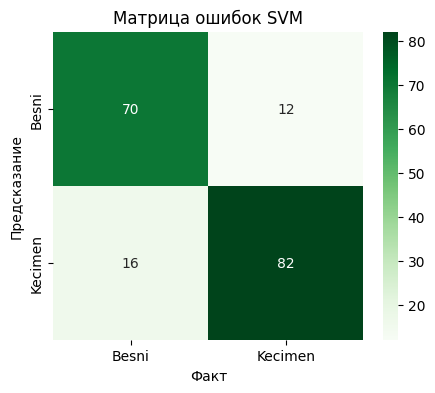

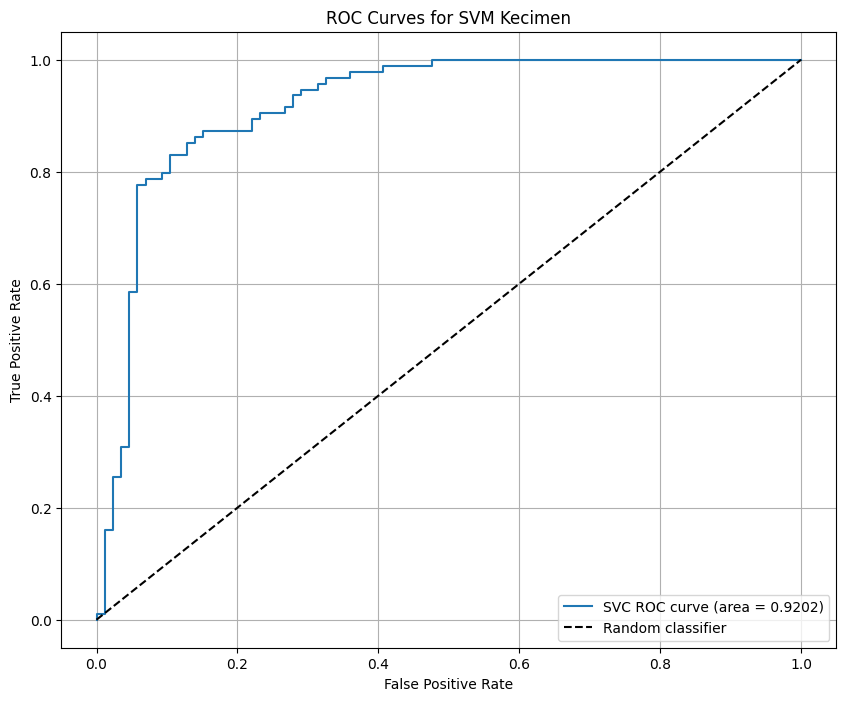

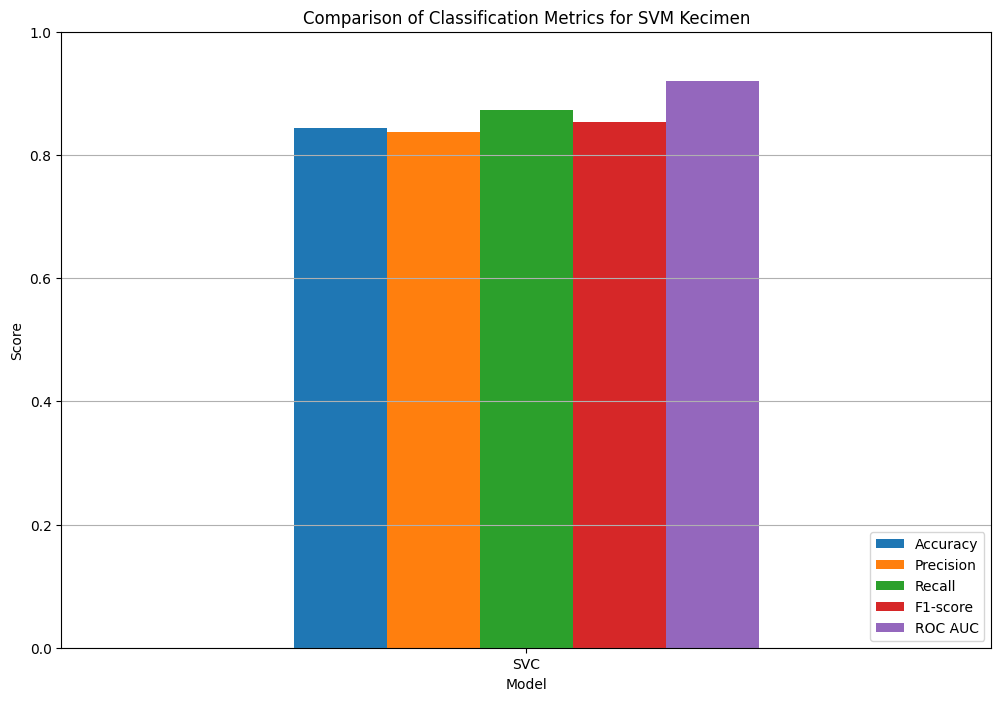

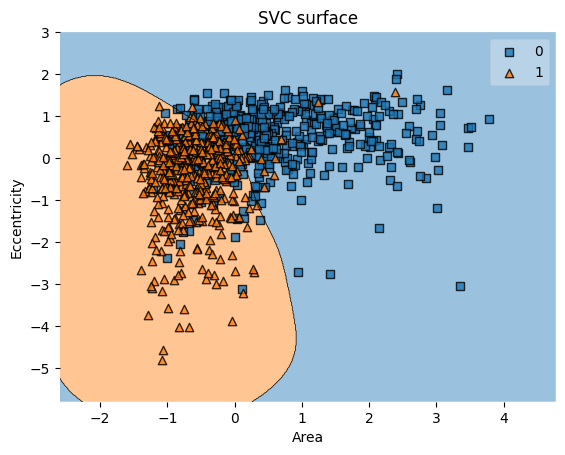

In [206]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Создаем и обучаем модель SVM с вероятностями
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Предсказания и вероятности на тесте
y_pred = svm_clf.predict(X_test)
y_proba = svm_clf.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

roc_auc = roc_auc_score(y_test, y_proba)

print("Отчет классификации SVM:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"ROC-AUC: {roc_auc:.3f}")

matrix = confusion_matrix(y_test, y_pred)
matrix_custom = matrix.T
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Besni', 'Kecimen'],
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок SVM")
plt.xlabel("Факт")
plt.ylabel("Предсказание")
plt.show()

# Собираем результаты моделей в словарь
models = {
    'SVC': (y_pred, y_proba)
}

# Подготавливаем данные для ROC
plt.figure(figsize=(10, 8))
for name, (pred, prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob, pos_label='Kecimen')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC Curves for SVM Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Подсчитываем метрики для каждой модели
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC AUC': []}
for name, (pred, prob) in models.items():
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['Recall'].append(recall_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['F1-score'].append(f1_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['ROC AUC'].append(roc_auc_score(y_test, prob))

metrics_df = pd.DataFrame(metrics).set_index('Model')

# Столбчатые диаграммы метрик
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Metrics for SVM Kecimen')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    # Кодируем y в целочисленные метки
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

feature_indexes = [0, 1]
title1 = 'SVC surface'
decision_boundary_plot(X, y, X_train, y_train, svm_clf, feature_indexes, title1)



## KNN

Отчет классификации KNN:
               precision    recall  f1-score   support

       Besni       0.84      0.81      0.83        86
     Kecimen       0.84      0.86      0.85        94

    accuracy                           0.84       180
   macro avg       0.84      0.84      0.84       180
weighted avg       0.84      0.84      0.84       180

ROC-AUC: 0.885


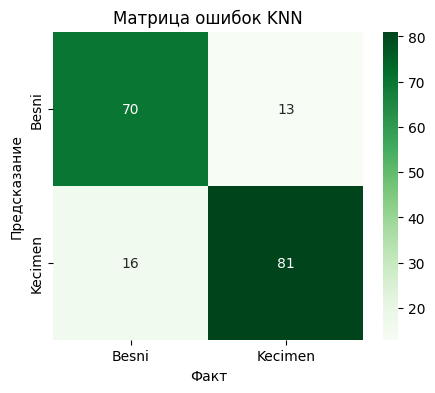

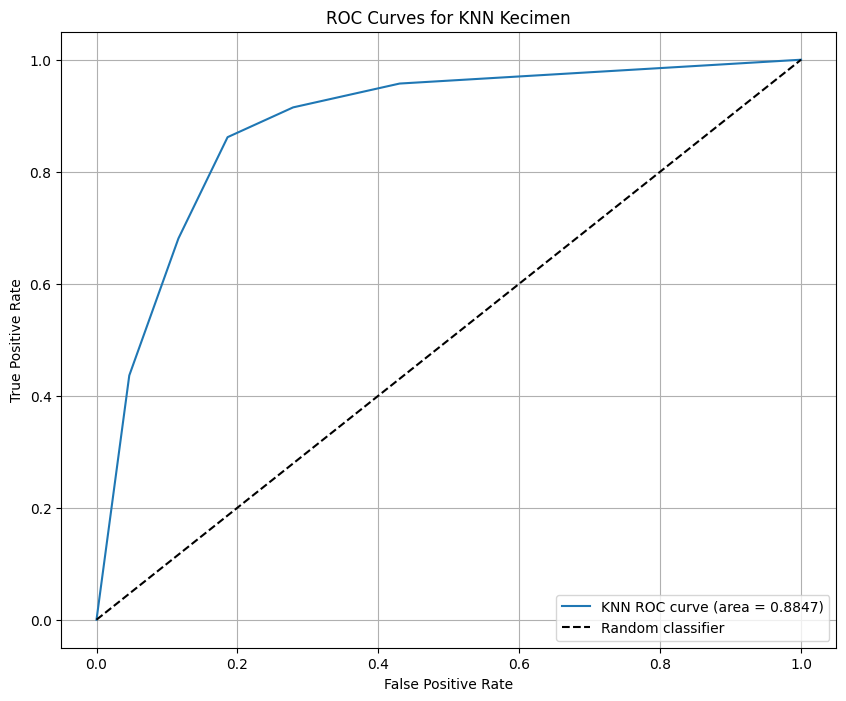

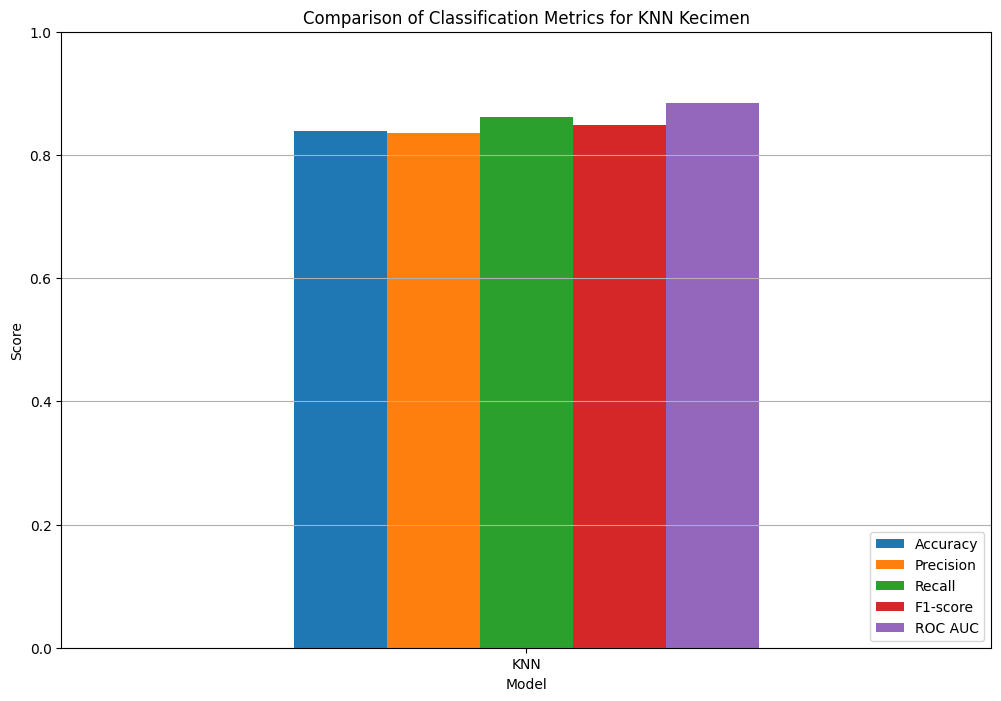

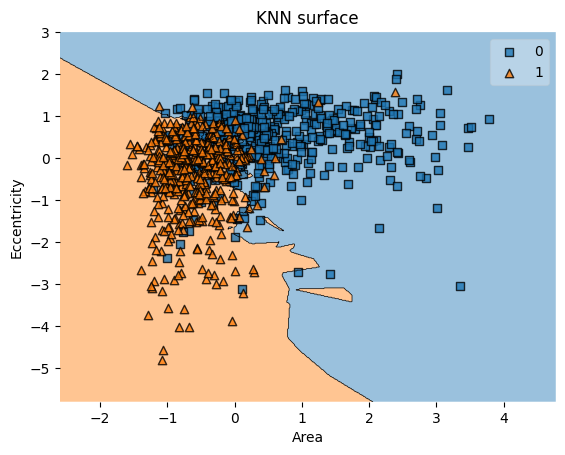

In [207]:
from sklearn.neighbors import KNeighborsClassifier

# Создаем и обучаем модель SVM с вероятностями
svm_clf = KNeighborsClassifier(n_neighbors=5)
svm_clf.fit(X_train, y_train)

# Предсказания и вероятности на тесте
y_pred = svm_clf.predict(X_test)
y_proba = svm_clf.predict_proba(X_test)[:, 1]  # Вероятности для положительного класса

roc_auc = roc_auc_score(y_test, y_proba)

print("Отчет классификации KNN:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"ROC-AUC: {roc_auc:.3f}")

matrix = confusion_matrix(y_test, y_pred)
matrix_custom = matrix.T
plt.figure(figsize=(5,4))
sns.heatmap(matrix_custom, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Besni', 'Kecimen'],
            yticklabels=['Besni', 'Kecimen'])
plt.title("Матрица ошибок KNN")
plt.xlabel("Факт")
plt.ylabel("Предсказание")
plt.show()

# Собираем результаты моделей в словарь
models = {
    'KNN': (y_pred, y_proba)
}

# Подготавливаем данные для ROC
plt.figure(figsize=(10, 8))
for name, (pred, prob) in models.items():
    fpr, tpr, _ = roc_curve(y_test, prob, pos_label='Kecimen')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} ROC curve (area = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC Curves for KNN Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Подсчитываем метрики для каждой модели
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'ROC AUC': []}
for name, (pred, prob) in models.items():
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['Recall'].append(recall_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['F1-score'].append(f1_score(y_test, pred, pos_label='Kecimen', zero_division=0))
    metrics['ROC AUC'].append(roc_auc_score(y_test, prob))

metrics_df = pd.DataFrame(metrics).set_index('Model')

# Столбчатые диаграммы метрик
metrics_df.plot(kind='bar', figsize=(12, 8))
plt.title('Comparison of Classification Metrics for KNN Kecimen')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    # Кодируем y в целочисленные метки
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)

feature_indexes = [0, 1]
title1 = 'KNN surface'
decision_boundary_plot(X, y, X_train, y_train, svm_clf, feature_indexes, title1)

## Сравнение качества классификаторов для бинарной классификации изюма


| Классификатор | Accuracy | Precision (Besni) | Recall (Besni) | F1 (Besni) | Precision (Kecimen) | Recall (Kecimen) | F1 (Kecimen) | ROC-AUC | Рейтинг |
|---------------|----------|-------------------|----------------|------------|---------------------|------------------|--------------|---------|---------|
| **LDA**       | **0.85** | 0.86              | 0.81           | 0.84       | 0.84                | 0.88             | 0.86         | **0.922** | **1** |
| **SVM**       | 0.84     | 0.85              | 0.81           | 0.83       | 0.84                | 0.87             | 0.85         | 0.920   | **2** |
| **GaussianNB** | 0.82    | 0.84              | 0.78           | 0.81       | 0.81                | 0.86             | 0.84         | 0.914   | **2** |
| **MultinomialNB** | **0.85** | 0.82           | 0.87           | 0.85       | **0.88**            | 0.83             | 0.85         | 0.911   | **3** |
| **ComplementNB** | 0.84     | **0.87**         | 0.78           | 0.82       | 0.82                | **0.89**         | 0.85         | 0.911   | **3** |
| **Decision Tree** | **0.85** | 0.86           | 0.81           | 0.84       | 0.84                | 0.88             | 0.86         | 0.882   | **4** |
| **KNN**       | 0.84     | 0.84              | 0.81           | 0.83       | 0.84                | 0.86             | 0.85         | 0.885   | **4** |
| **BernoulliNB** | 0.82    | 0.88              | 0.73           | 0.80       | 0.79                | **0.90**         | 0.84         | 0.824   | **5** |

1. **LDA** - лучшая модель по ROC-AUC с высокой accuracy
2. **SVM & GaussianNB** - отличное качество классификации, близкое к LDA  
3. **MultinomialNB & ComplementNB** - хорошая точность с сильными сторонами для конкретных классов
4. **Decision Tree & KNN** - сбалансированная производительность
5. **BernoulliNB** - специализированная модель с экстремальными показателями recall


- **Для класса Besni**: лучший precision у BernoulliNB (0.88), лучший recall у MultinomialNB (0.87)
- **Для класса Kecimen**: лучший recall у ComplementNB и BernoulliNB (0.89-0.90)
- **Наибольший ROC-AUC**: LDA (0.922) - наилучшее общее качество классификации

## Исследование влияния гиперпараметров на качество классификации

### Наивный Байесовский


🔍 Тестируем GaussianNB...

Таблица метрик для GaussianNB


Accuracy  Precision    Recall        F1   ROC_AUC
var_smoothing                                                   
1.000000e-12   0.822222       0.81  0.861702  0.835052  0.914028
1.584893e-11   0.822222       0.81  0.861702  0.835052  0.914028
2.511886e-10   0.822222       0.81  0.861702  0.835052  0.914028
3.981072e-09   0.822222       0.81  0.861702  0.835052  0.914028
6.309573e-08   0.822222       0.81  0.861702  0.835052  0.914028
1.000000e-06   0.822222       0.81  0.861702  0.835052  0.914028

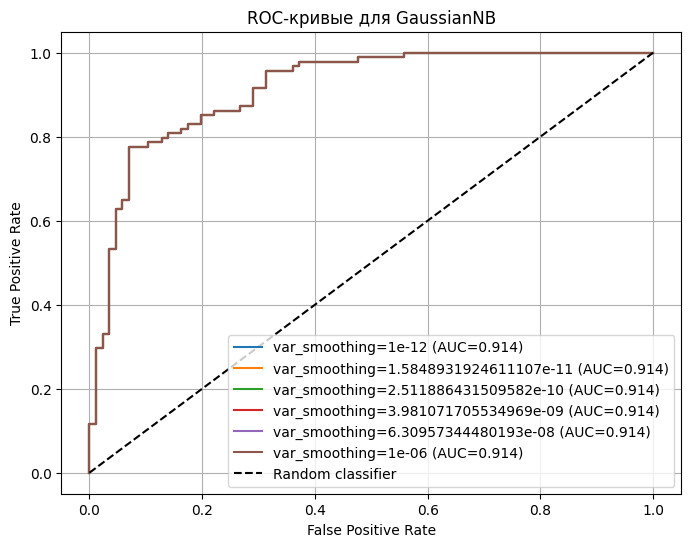

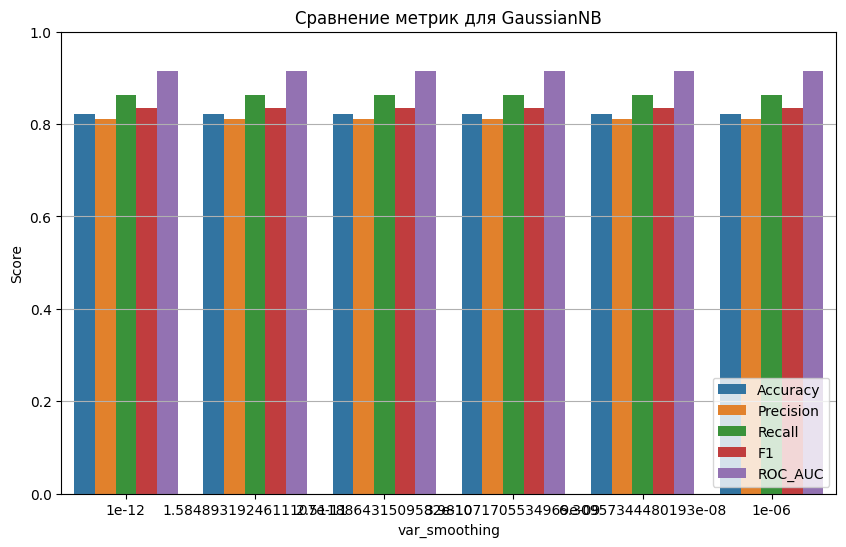


🔍 Тестируем MultinomialNB...

Таблица метрик для MultinomialNB


Accuracy  Precision    Recall        F1   ROC_AUC
alpha                                                   
0.1    0.844444   0.875000  0.819149  0.846154  0.911183
0.5    0.844444   0.875000  0.819149  0.846154  0.911183
1.0    0.850000   0.876404  0.829787  0.852459  0.911183
2.0    0.850000   0.876404  0.829787  0.852459  0.911554
5.0    0.850000   0.876404  0.829787  0.852459  0.911554

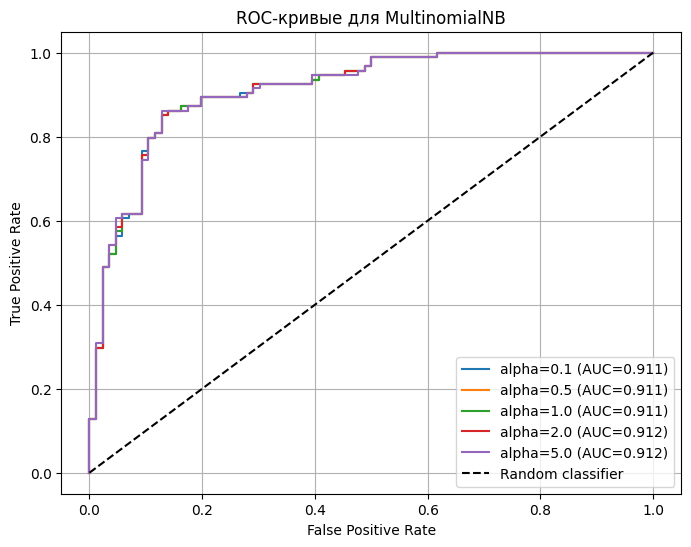

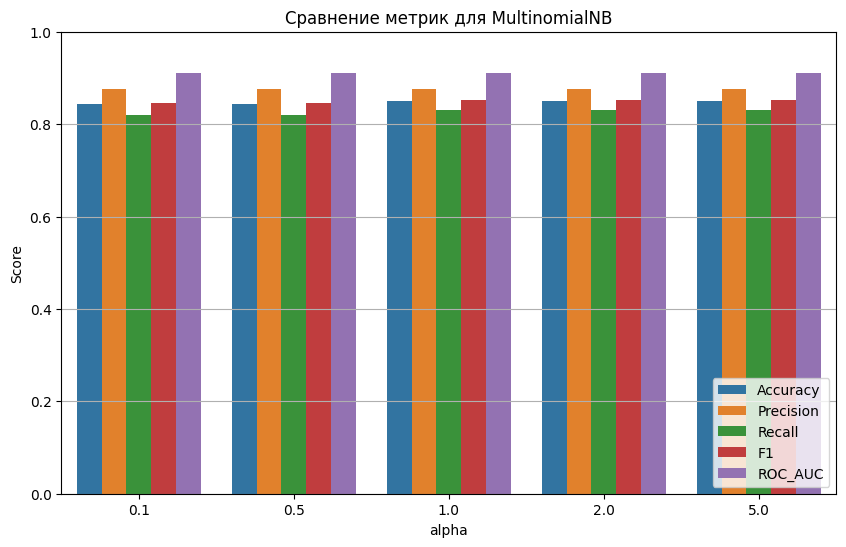


🔍 Тестируем ComplementNB...

Таблица метрик для ComplementNB


Accuracy  Precision    Recall        F1   ROC_AUC
alpha                                                   
0.1    0.838889   0.815534  0.893617  0.852792  0.911183
0.5    0.838889   0.815534  0.893617  0.852792  0.911183
1.0    0.838889   0.815534  0.893617  0.852792  0.911183
2.0    0.838889   0.815534  0.893617  0.852792  0.911554
5.0    0.833333   0.807692  0.893617  0.848485  0.911554

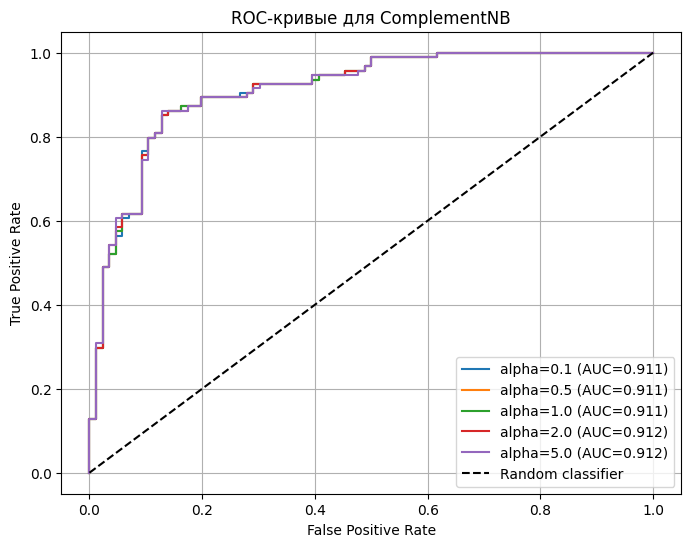

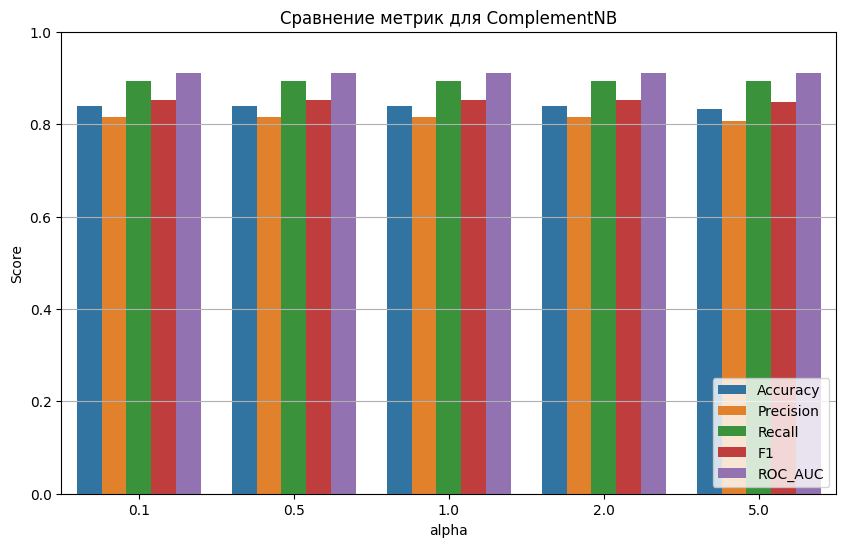


🔍 Тестируем BernoulliNB...

Таблица метрик для BernoulliNB


Accuracy  Precision    Recall        F1   ROC_AUC
binarize                                                   
0.1       0.550000   1.000000  0.138298  0.242991  0.569149
0.3       0.822222   0.787037  0.904255  0.841584  0.824097
0.5       0.650000   0.598726  1.000000  0.749004  0.686356
0.7       0.705556   0.780822  0.606383  0.682635  0.705468

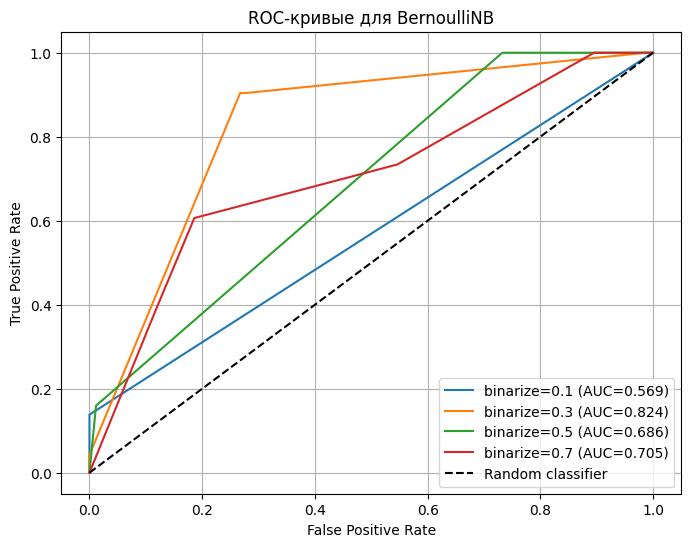

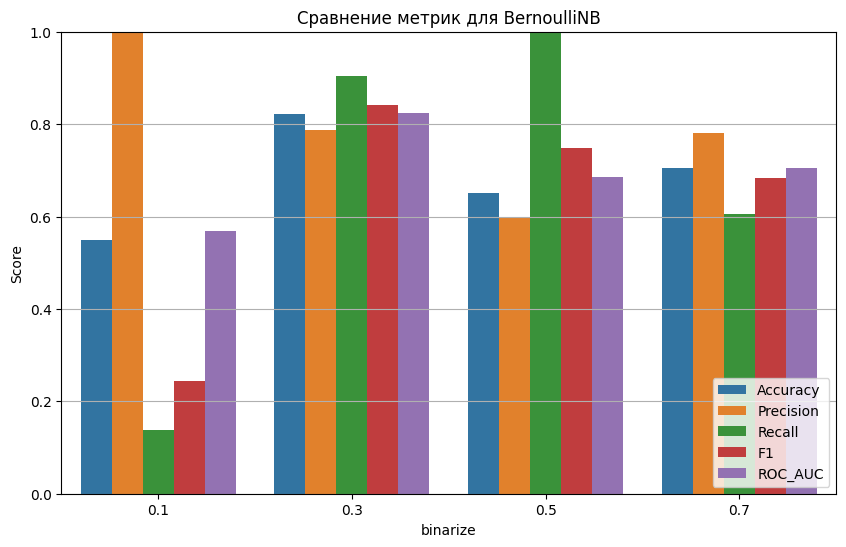

In [208]:
from sklearn.model_selection import ParameterGrid

target = 'Class'
X = df.drop(target, axis=1)
y = df[target]

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# === Настраиваем сетки гиперпараметров ===
param_grids = {
    "GaussianNB": {"var_smoothing": np.logspace(-12, -6, 6)},
    "MultinomialNB": {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0]},
    "ComplementNB": {"alpha": [0.1, 0.5, 1.0, 2.0, 5.0]},
    "BernoulliNB": {"binarize": [0.1, 0.3, 0.5, 0.7]}
}


# === Вспомогательная функция для вычисления метрик ===
def evaluate_model(model, params, X_train, X_test, y_train, y_test):
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        "Params": params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "Recall": recall_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "F1": f1_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_proba),
        "y_proba": y_proba
    }


# === Основной цикл по моделям ===
results = {}

for model_name, grid in param_grids.items():
    print(f"\n🔍 Тестируем {model_name}...")
    ModelClass = eval(model_name)
    model = ModelClass()
    
    model_results = []
    for params in ParameterGrid(grid):
        res = evaluate_model(model, params, X_train, X_test, y_train, y_test)
        model_results.append(res)
    
    results[model_name] = pd.DataFrame([
        {**r["Params"], **{k: v for k, v in r.items() if k not in ["Params", "y_proba"]}}
        for r in model_results
    ])

    # === Таблица результатов ===
    print("\nТаблица метрик для", model_name)
    display(results[model_name].set_index(list(grid.keys())))

    # === ROC-кривые ===
    plt.figure(figsize=(8, 6))
    for r in model_results:
        label = ", ".join([f"{k}={v}" for k, v in r["Params"].items()])
        fpr, tpr, _ = roc_curve(y_test, r["y_proba"], pos_label='Kecimen')
        auc_value = roc_auc_score(y_test, r["y_proba"])
        plt.plot(fpr, tpr, label=f"{label} (AUC={auc_value:.3f})")
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
    plt.title(f"ROC-кривые для {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.show()
    
    # === Столбчатая диаграмма метрик ===
    melted = results[model_name].melt(
        id_vars=list(grid.keys()), 
        value_vars=["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"],
        var_name="Metric", value_name="Score"
    )
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=melted, x=list(grid.keys())[0], y="Score", hue="Metric")
    plt.title(f"Сравнение метрик для {model_name}")
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.legend(loc='lower right')
    plt.show()

### Дерево решений

Таблица метрик для DecisionTreeClassifier:


Accuracy  Precision    Recall        F1   ROC_AUC
criterion max_depth                                                   
gini      2          0.800000   0.829545  0.776596  0.802198  0.855208
          3          0.844444   0.823529  0.893617  0.857143  0.875619
          4          0.850000   0.838384  0.882979  0.860104  0.881556
          5          0.838889   0.828283  0.872340  0.849741  0.898751
          6          0.844444   0.836735  0.872340  0.854167  0.887803
          8          0.844444   0.836735  0.872340  0.854167  0.890957
          10         0.827778   0.831579  0.840426  0.835979  0.861331
entropy   2          0.816667   0.827957  0.819149  0.823529  0.855888
          3          0.844444   0.823529  0.893617  0.857143  0.874258
          4          0.850000   0.831683  0.893617  0.861538  0.905616
          5          0.838889   0.828283  0.872340  0.849741  0.915760
          6          0.855556   0.840000  0.893617  0.865979  0.896091
          8          0.838889   0.842105  0.851064  0.846561  0.881123
          10         0.833333   0.826531  0.861702  0.843750  0.865475

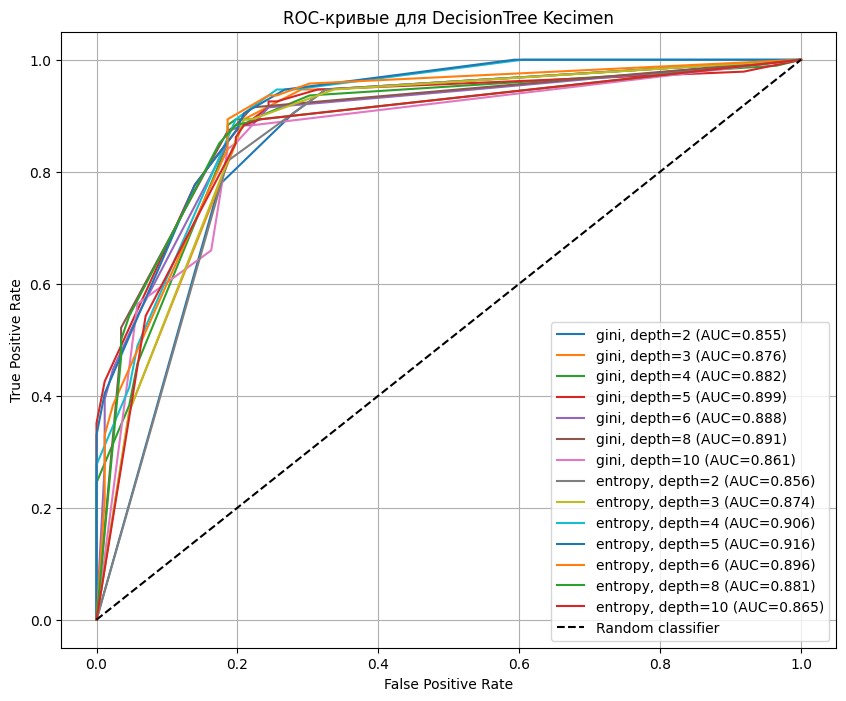

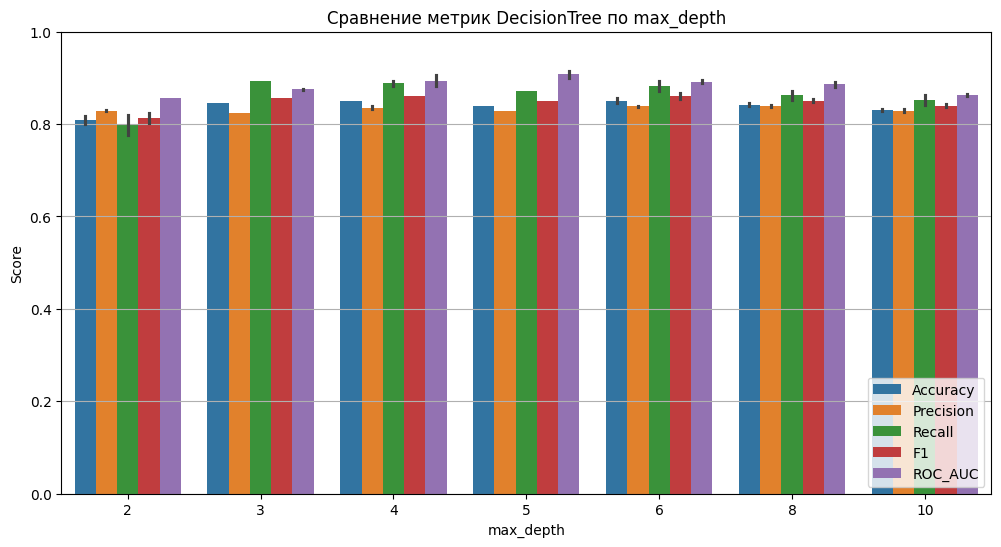

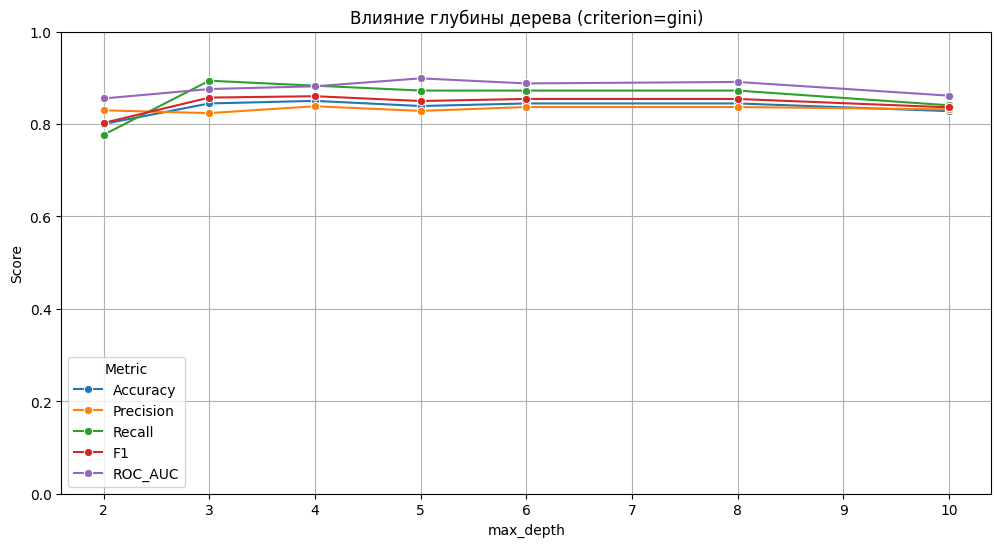

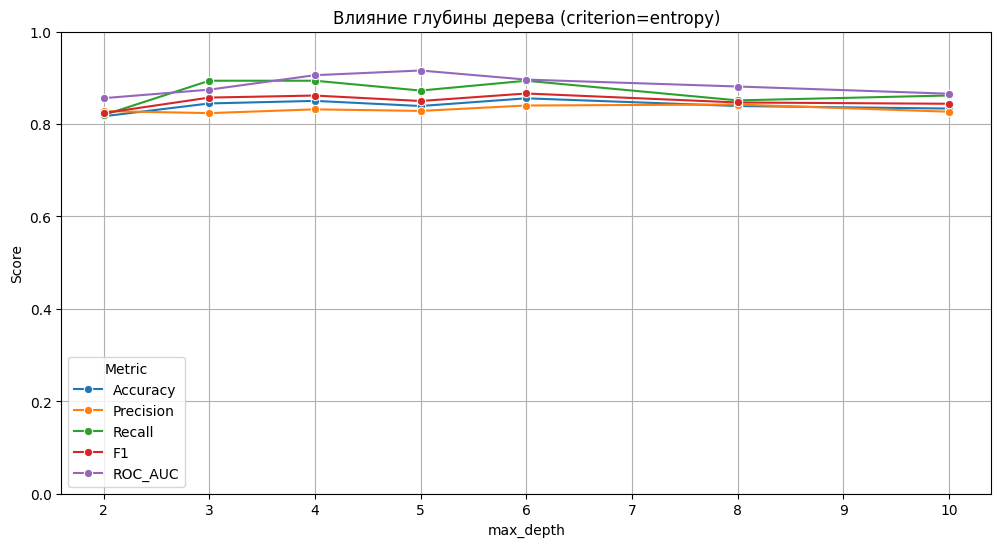


Лучшие параметры: {'criterion': 'entropy', 'max_depth': 5}


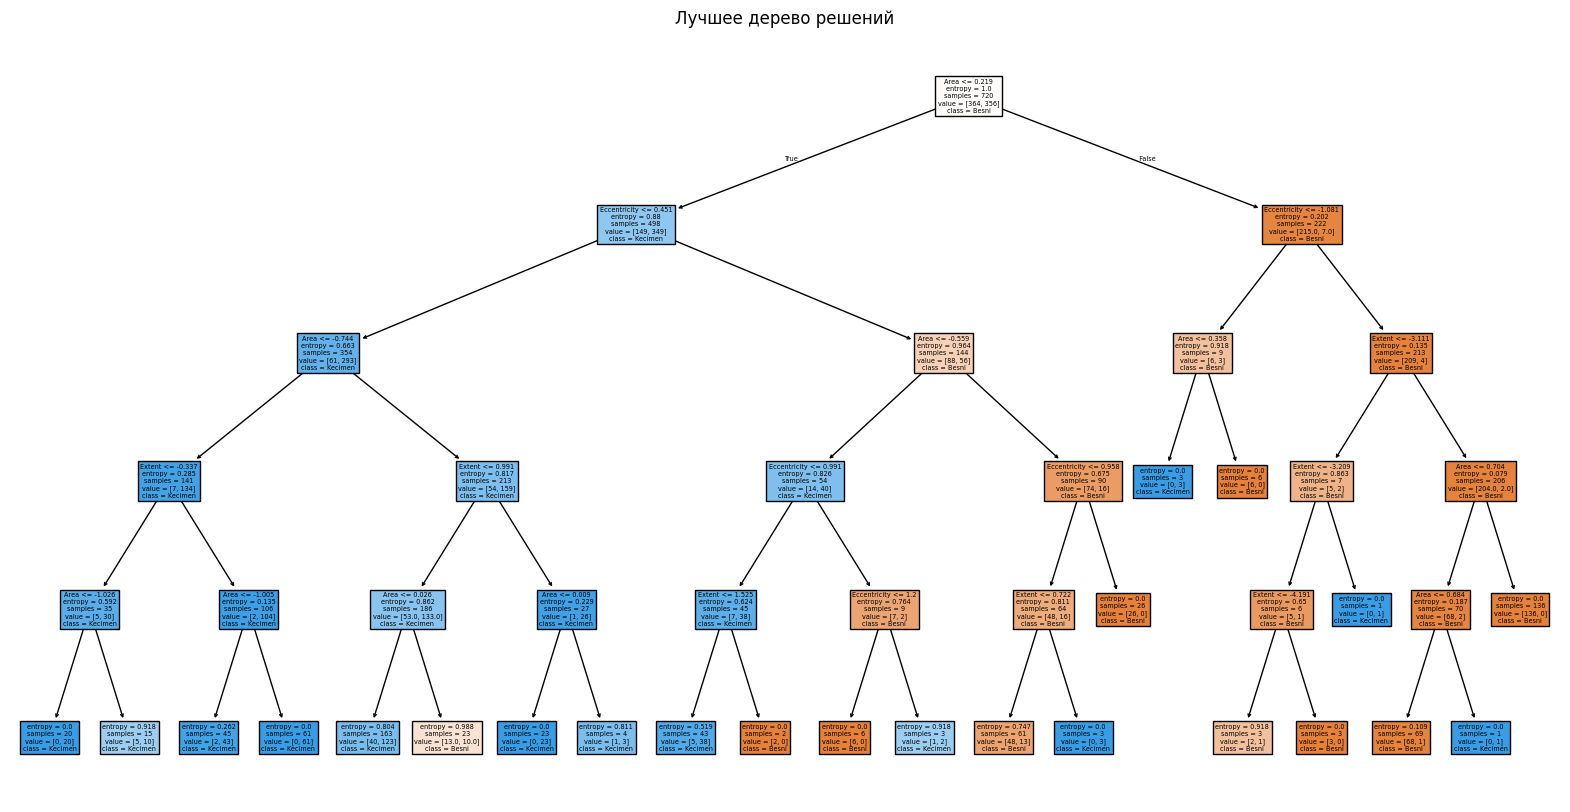

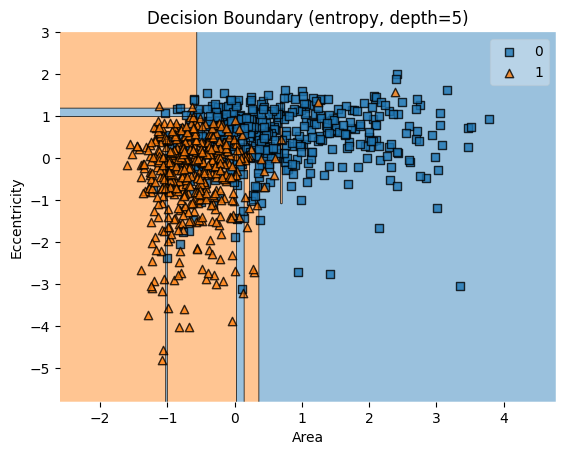

In [209]:
target = 'Class'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# === Гиперпараметры ===
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 8, 10]
}


# === Функция для вычисления метрик ===
def evaluate_model(model, params, X_train, X_test, y_train, y_test):
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "Params": params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "Recall": recall_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "F1": f1_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_proba),
        "y_proba": y_proba,
        "y_pred": y_pred
    }


# === Основной цикл по параметрам ===
results = []
for params in ParameterGrid(param_grid):
    model = DecisionTreeClassifier(random_state=42)
    scores = evaluate_model(model, params, X_train, X_test, y_train, y_test)
    results.append(scores)

# === Преобразуем результаты в DataFrame ===
results_df = pd.DataFrame([
    {**r["Params"], **{k: v for k, v in r.items() if k not in ["Params", "y_proba", "y_pred"]}}
    for r in results
])

print("Таблица метрик для DecisionTreeClassifier:")
display(results_df.set_index(["criterion", "max_depth"]))

# === ROC-кривые ===
plt.figure(figsize=(10, 8))
for r in results:
    label = f"{r['Params']['criterion']}, depth={r['Params']['max_depth']}"
    fpr, tpr, _ = roc_curve(y_test, r["y_proba"], pos_label='Kecimen')
    auc_value = roc_auc_score(y_test, r["y_proba"])
    plt.plot(fpr, tpr, label=f"{label} (AUC={auc_value:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC-кривые для DecisionTree Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# === Столбчатые диаграммы метрик ===
melted = results_df.melt(
    id_vars=["criterion", "max_depth"], 
    value_vars=["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"],
    var_name="Metric", value_name="Score"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x="max_depth", y="Score", hue="Metric")
plt.title("Сравнение метрик DecisionTree по max_depth")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

# === Отдельная визуализация по критерию ===
for crit in ["gini", "entropy"]:
    subset = melted[melted["criterion"] == crit]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=subset, x="max_depth", y="Score", hue="Metric", marker="o")
    plt.title(f"Влияние глубины дерева (criterion={crit})")
    plt.ylim(0, 1)
    plt.grid(True)
    plt.show()


# === Визуализация одного из деревьев ===
best_params = results_df.sort_values(by="ROC_AUC", ascending=False).iloc[0][["criterion", "max_depth"]].to_dict()
print(f"\nЛучшие параметры: {best_params}")

best_model = DecisionTreeClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["Besni", "Kecimen"])
plt.title("Лучшее дерево решений")
plt.show()


# === Визуализация границы решений (2 признака) ===
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)
    plt.show()


feature_indexes = [0, 1]
decision_boundary_plot(X, y, X_train, y_train, best_model, feature_indexes, 
                       title=f"Decision Boundary ({best_params['criterion']}, depth={best_params['max_depth']})")

### LDA

Таблица метрик для LinearDiscriminantAnalysis:


solver     tol  Accuracy  Precision    Recall        F1   ROC_AUC shrinkage
0     svd  0.0001  0.850000   0.838384  0.882979  0.860104  0.922439       NaN
1     svd  0.0010  0.850000   0.838384  0.882979  0.860104  0.922439       NaN
2     svd  0.0100  0.850000   0.838384  0.882979  0.860104  0.922439       NaN
3    lsqr  0.0001  0.850000   0.838384  0.882979  0.860104  0.922439      None
4   eigen  0.0001  0.850000   0.838384  0.882979  0.860104  0.922439      None
5    lsqr  0.0001  0.850000   0.838384  0.882979  0.860104  0.922316      auto
6   eigen  0.0001  0.850000   0.838384  0.882979  0.860104  0.922316      auto
7    lsqr  0.0001  0.850000   0.838384  0.882979  0.860104  0.922687       0.1
8   eigen  0.0001  0.850000   0.838384  0.882979  0.860104  0.922687       0.1
9    lsqr  0.0001  0.838889   0.835052  0.861702  0.848168  0.922687       0.5
10  eigen  0.0001  0.838889   0.835052  0.861702  0.848168  0.922687       0.5
11   lsqr  0.0001  0.844444   0.836735  0.872340  0.854167  0.917491       0.9
12  eigen  0.0001  0.844444   0.836735  0.872340  0.854167  0.917491       0.9

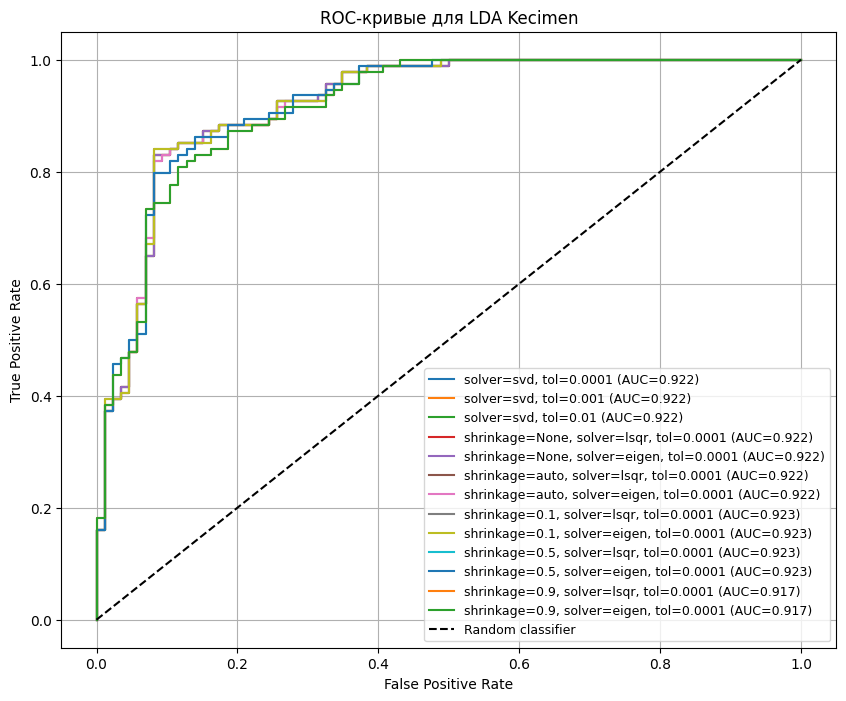

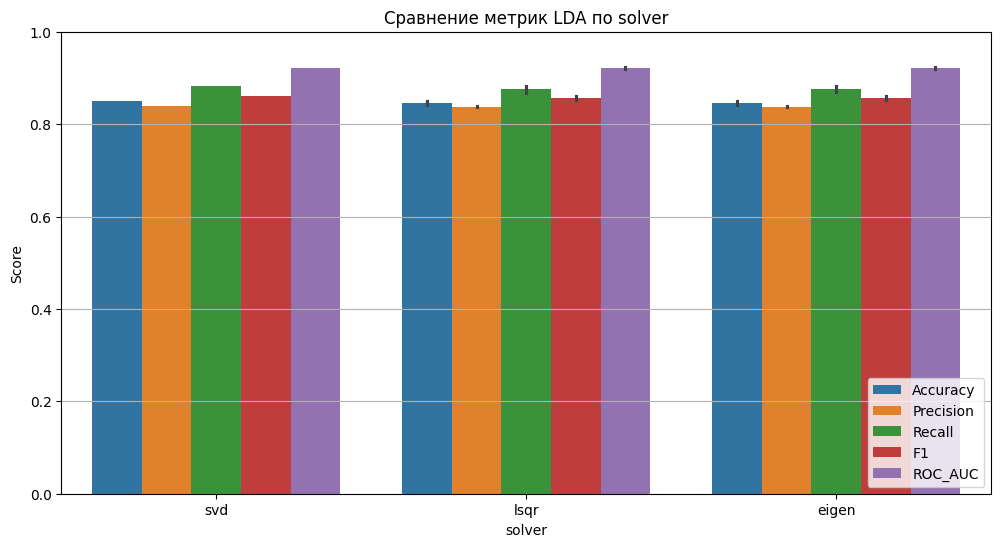

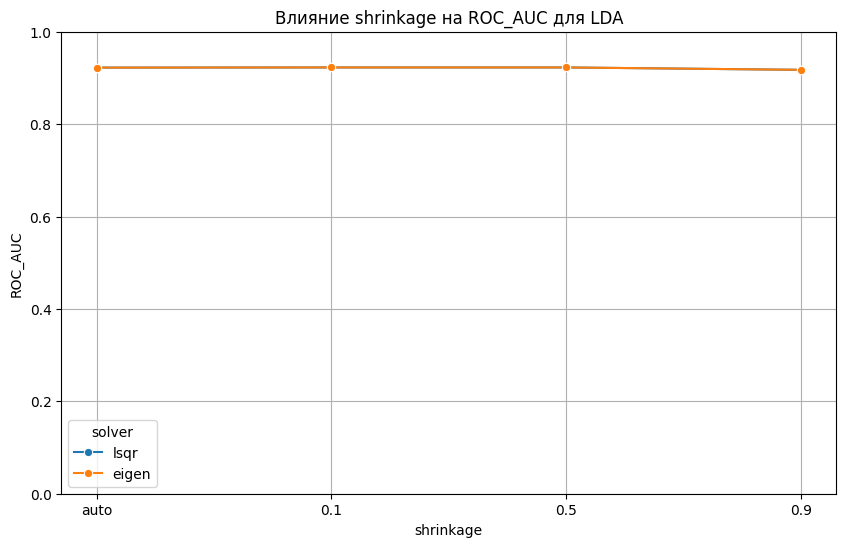


Лучшие параметры LDA: {'shrinkage': 0.1, 'solver': 'lsqr', 'tol': 0.0001}


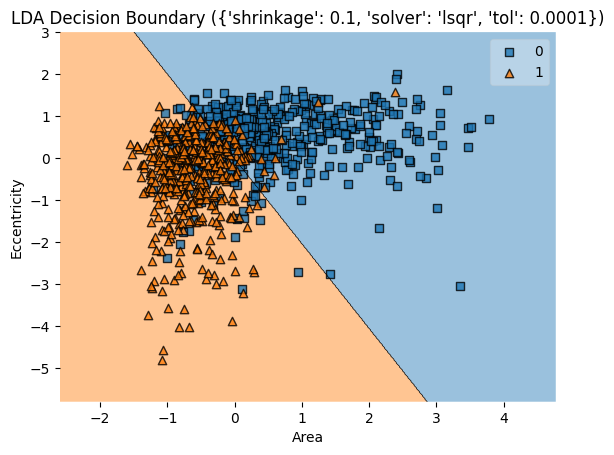

In [210]:
target = 'Class'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Определяем сетку гиперпараметров ===
param_grid = [
    {"solver": ["svd"], "tol": [1e-4, 1e-3, 1e-2]},
    {"solver": ["lsqr", "eigen"], "shrinkage": [None, "auto", 0.1, 0.5, 0.9], "tol": [1e-4]}
]

# === Функция для вычисления метрик ===
def evaluate_model(model, params, X_train, X_test, y_train, y_test):
    model.set_params(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    return {
        "Params": params,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "Recall": recall_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "F1": f1_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_proba),
        "y_proba": y_proba
    }

# === Основной цикл по сеткам параметров ===
results = []
for grid in param_grid:
    for params in ParameterGrid(grid):
        try:
            model = LinearDiscriminantAnalysis()
            scores = evaluate_model(model, params, X_train, X_test, y_train, y_test)
            results.append(scores)
        except Exception as e:
            print(f"Ошибка при параметрах {params}: {e}")

# === Таблица метрик ===
results_df = pd.DataFrame([
    {**r["Params"], **{k: v for k, v in r.items() if k not in ["Params", "y_proba"]}}
    for r in results
])

print("Таблица метрик для LinearDiscriminantAnalysis:")
display(results_df)

# === ROC-кривые ===
plt.figure(figsize=(10, 8))
for r in results:
    label = ", ".join([f"{k}={v}" for k, v in r["Params"].items()])
    fpr, tpr, _ = roc_curve(y_test, r["y_proba"], pos_label='Kecimen')
    auc_value = roc_auc_score(y_test, r["y_proba"])
    plt.plot(fpr, tpr, label=f"{label} (AUC={auc_value:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC-кривые для LDA Kecimen')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=9)
plt.grid()
plt.show()

# === Столбчатая диаграмма метрик ===
melted = results_df.melt(
    id_vars=["solver"] + [col for col in results_df.columns if col in ["shrinkage", "tol"]],
    value_vars=["Accuracy", "Precision", "Recall", "F1", "ROC_AUC"],
    var_name="Metric", value_name="Score"
)

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x="solver", y="Score", hue="Metric")
plt.title("Сравнение метрик LDA по solver")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()

# === Визуализация зависимости ROC_AUC от shrinkage (для lsqr/eigen) ===
subset = results_df[
    results_df["solver"].isin(["lsqr", "eigen"]) & results_df["shrinkage"].notna()
].copy()

subset["shrinkage"] = subset["shrinkage"].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x="shrinkage", y="ROC_AUC", hue="solver", marker="o")
plt.title("Влияние shrinkage на ROC_AUC для LDA")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# === Лучшая модель ===
best_index = max(range(len(results)), key=lambda i: results[i]["ROC_AUC"])
best_params = results[best_index]["Params"]
print(f"\nЛучшие параметры LDA: {best_params}")

best_model = LinearDiscriminantAnalysis(**best_params)
best_model.fit(X_train, y_train)

# === Визуализация границы решений ===
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    plt.title(title)
    plt.show()

feature_indexes = [0, 1]
decision_boundary_plot(X, y, X_train, y_train, best_model, feature_indexes,
                       title=f"LDA Decision Boundary ({best_params})")

### SVM

kernel     C  gamma  Accuracy  Precision    Recall  F1-score   ROC_AUC
0  linear   0.1  scale  0.866667   0.880435  0.861702  0.870968  0.921821
1  linear   0.1   auto  0.866667   0.880435  0.861702  0.870968  0.921821
2  linear   1.0  scale  0.861111   0.870968  0.861702  0.866310  0.921697
3  linear   1.0   auto  0.861111   0.870968  0.861702  0.866310  0.921697
4  linear  10.0  scale  0.861111   0.870968  0.861702  0.866310  0.921697

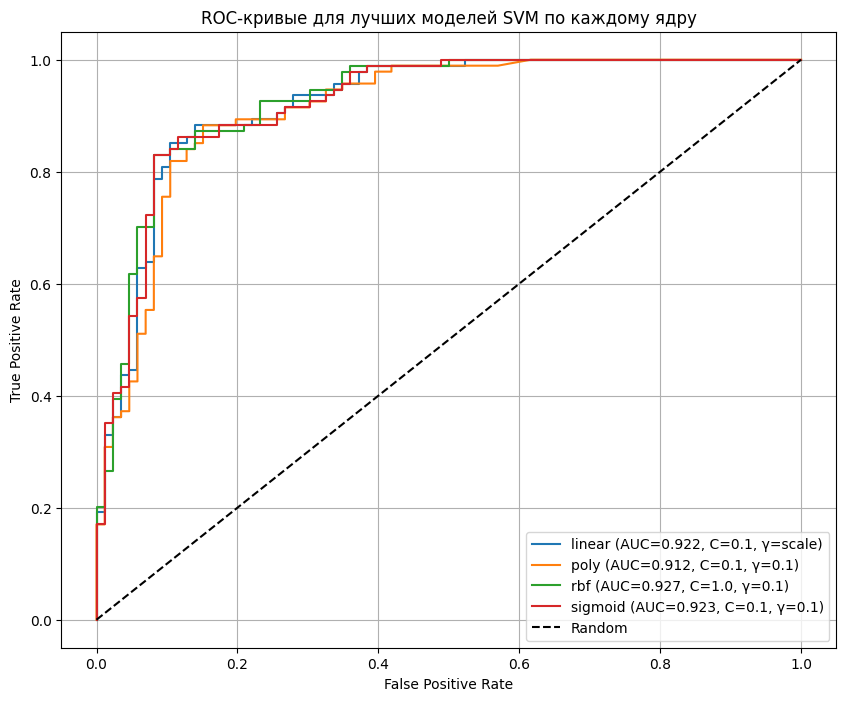

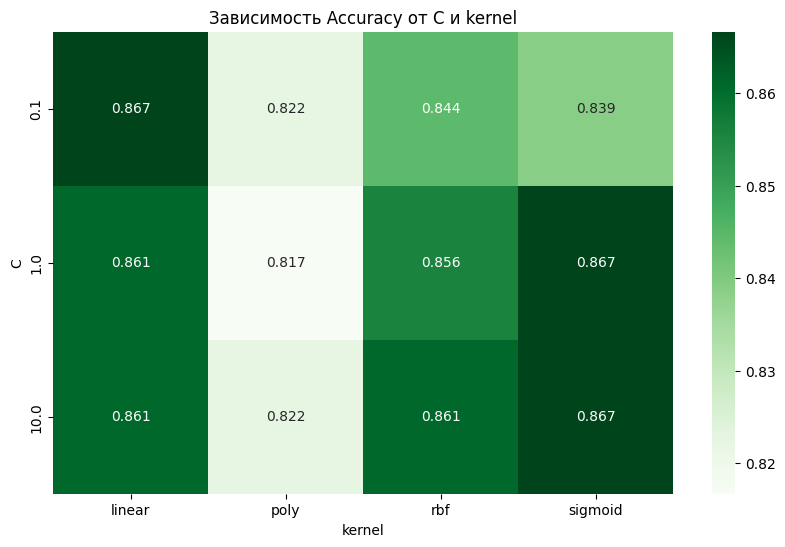

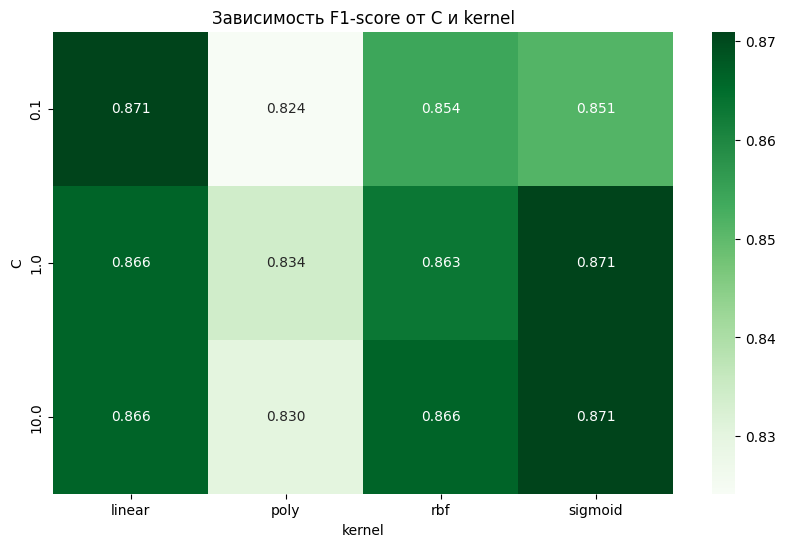

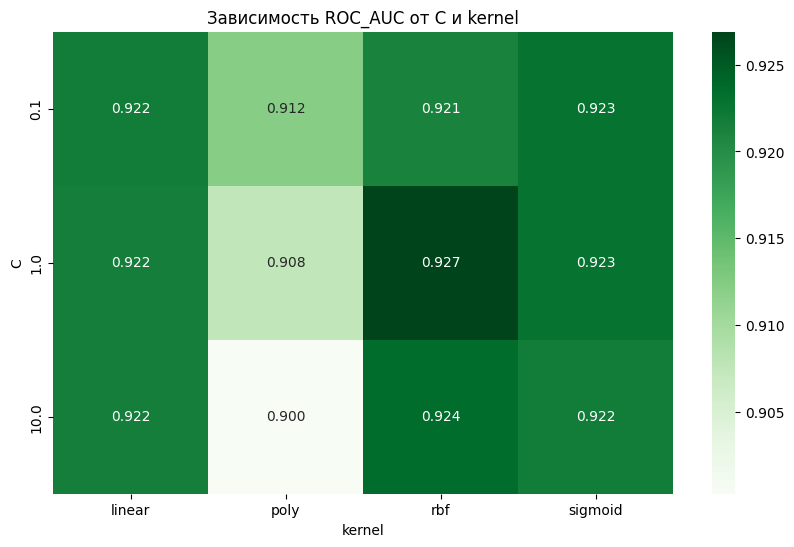

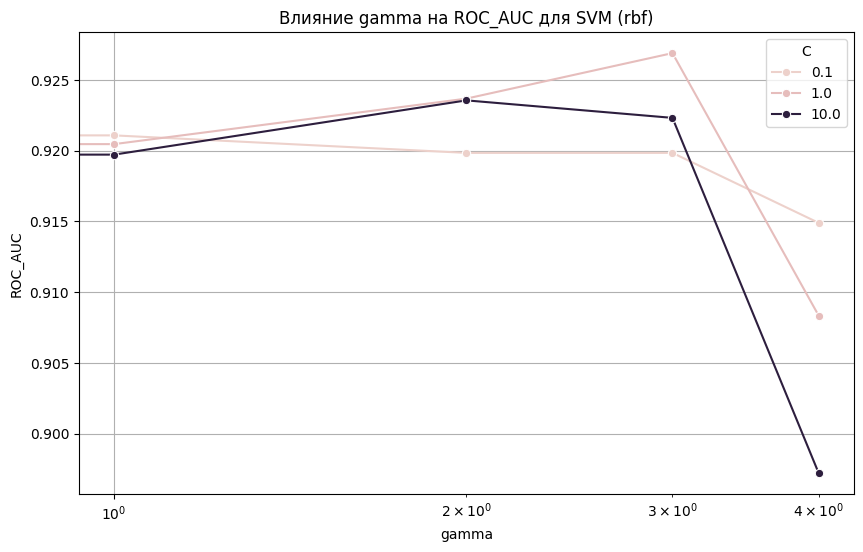

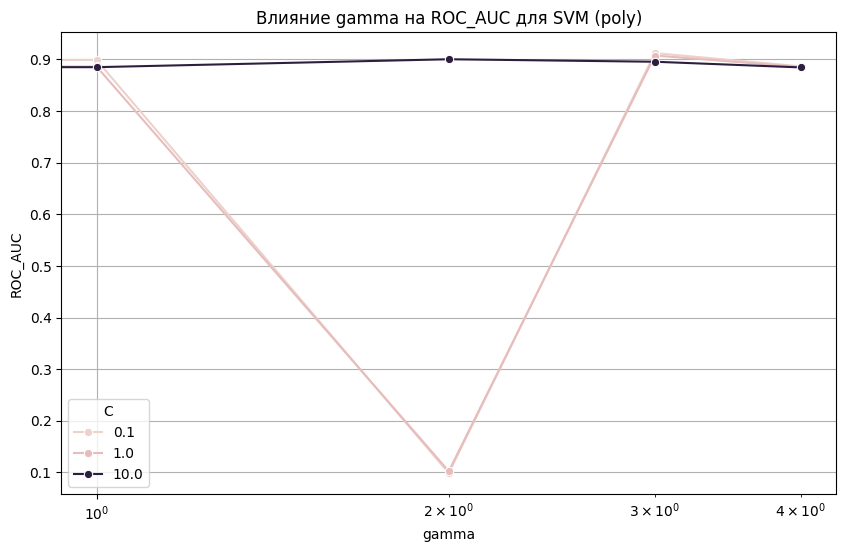

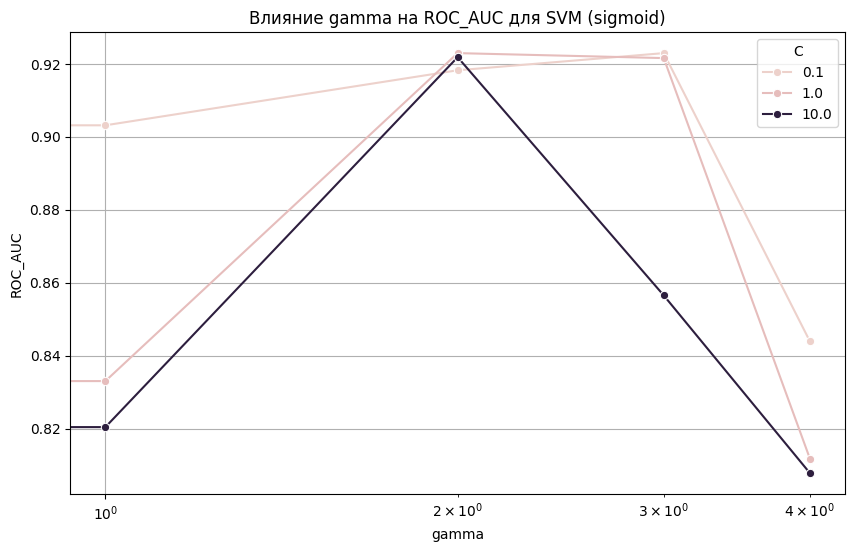

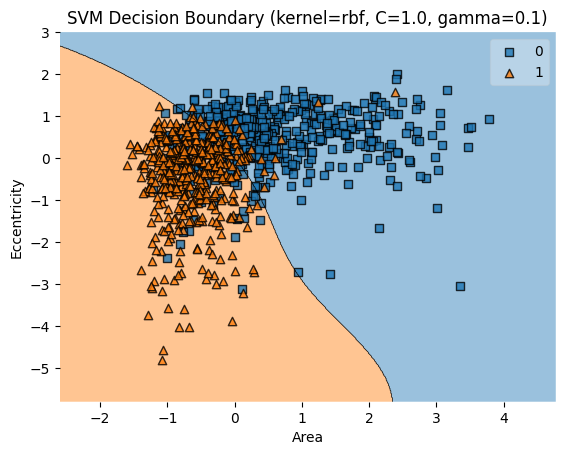

In [213]:
target = 'Class'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10]
gamma_values = ['scale', 'auto', 0.01, 0.1, 1]

results = []

# --- Перебор параметров ---
for kernel in kernels:
    for C in C_values:
        for gamma in gamma_values:
            # Ограничим gamma только для ядер, где это имеет смысл
            if kernel == 'linear' and gamma not in ['scale', 'auto']:
                continue
            
            clf = SVC(kernel=kernel, C=C, gamma=gamma, probability=True, random_state=42)
            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            y_proba = clf.predict_proba(X_test)[:, 1]
            
            results.append({
                'kernel': kernel,
                'C': C,
                'gamma': gamma,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
                'Recall': recall_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
                'F1-score': f1_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
                'ROC_AUC': roc_auc_score(y_test, y_proba)
            })

# --- Преобразуем в DataFrame ---
results_df = pd.DataFrame(results)
display(results_df.head())

# --- ROC-кривые для каждой комбинации ---
plt.figure(figsize=(10, 8))
for kernel in kernels:
    subset = results_df[results_df["kernel"] == kernel]
    best_idx = subset["ROC_AUC"].idxmax()
    best_row = subset.loc[best_idx]
    
    clf_best = SVC(
        kernel=best_row["kernel"], 
        C=best_row["C"], 
        gamma=best_row["gamma"], 
        probability=True, 
        random_state=42
    )
    clf_best.fit(X_train, y_train)
    y_proba = clf_best.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Kecimen')
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{kernel} (AUC={roc_auc:.3f}, C={best_row['C']}, γ={best_row['gamma']})")

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title("ROC-кривые для лучших моделей SVM по каждому ядру")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# --- Тепловая карта метрик ---
for metric in ["Accuracy", "F1-score", "ROC_AUC"]:
    plt.figure(figsize=(10, 6))
    pivot = results_df.pivot_table(values=metric, index="C", columns="kernel", aggfunc='max')
    sns.heatmap(pivot, annot=True, cmap="Greens", fmt=".3f")
    plt.title(f"Зависимость {metric} от C и kernel")
    plt.ylabel("C")
    plt.xlabel("kernel")
    plt.show()

# --- Линейные графики для разных значений gamma ---
for kernel in ['rbf', 'poly', 'sigmoid']:
    plt.figure(figsize=(10, 6))
    subset = results_df[results_df["kernel"] == kernel].copy()
    subset["gamma"] = subset["gamma"].astype(str)  # преобразуем к строкам
    sns.lineplot(data=subset, x="gamma", y="ROC_AUC", hue="C", marker="o")
    plt.title(f"Влияние gamma на ROC_AUC для SVM ({kernel})")
    plt.xscale("log")  # логарифмическая шкала по оси X
    plt.grid(True)
    plt.show()


best_idx = results_df["ROC_AUC"].idxmax()
best_params = results_df.loc[best_idx]

# Обучим лучшую модель на всем тренировочном наборе
svm_clf = SVC(
    kernel=best_params["kernel"],
    C=best_params["C"],
    gamma=best_params["gamma"],
    probability=True,
    random_state=42
)
svm_clf.fit(X_train, y_train)

# Функция для построения поверхности решений (копия из вашего кода)
def decision_boundary_plot(X, y, X_train, y_train, clf, feature_indexes, title=None):
    feature1_name, feature2_name = X.columns[feature_indexes]
    X_feature_columns = X.iloc[:, feature_indexes].values
    X_train_feature_columns = X_train.iloc[:, feature_indexes].values

    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    y_train_encoded = le.transform(y_train)

    clf.fit(X_train_feature_columns, y_train_encoded)

    plot_decision_regions(X=X_feature_columns, y=y_encoded, clf=clf)
    plt.xlabel(feature1_name)
    plt.ylabel(feature2_name)
    if title:
        plt.title(title)
    plt.show()

# Выбираем первые два признака для визуализации
feature_indexes = [0, 1]
title1 = f"SVM Decision Boundary (kernel={best_params['kernel']}, C={best_params['C']}, gamma={best_params['gamma']})"
decision_boundary_plot(X, y, X_train, y_train, svm_clf, feature_indexes, title1)

### KNN

n_neighbors   weights     metric  Accuracy  Precision    Recall  F1-score  \
0             1   uniform  minkowski  0.838889   0.857143  0.829787  0.843243   
1             3   uniform  minkowski  0.838889   0.835052  0.861702  0.848168   
2             5   uniform  minkowski  0.838889   0.835052  0.861702  0.848168   
3             7   uniform  minkowski  0.833333   0.826531  0.861702  0.843750   
4             9   uniform  minkowski  0.838889   0.828283  0.872340  0.849741   
5            11   uniform  minkowski  0.844444   0.836735  0.872340  0.854167   
6            15   uniform  minkowski  0.838889   0.828283  0.872340  0.849741   
7             1   uniform  manhattan  0.838889   0.865169  0.819149  0.841530   
8             3   uniform  manhattan  0.838889   0.842105  0.851064  0.846561   
9             5   uniform  manhattan  0.833333   0.840426  0.840426  0.840426   
10            7   uniform  manhattan  0.838889   0.828283  0.872340  0.849741   
11            9   uniform  manhattan  0.838889   0.828283  0.872340  0.849741   
12           11   uniform  manhattan  0.844444   0.836735  0.872340  0.854167   
13           15   uniform  manhattan  0.827778   0.811881  0.872340  0.841026   
14            1   uniform  euclidean  0.838889   0.857143  0.829787  0.843243   
15            3   uniform  euclidean  0.838889   0.835052  0.861702  0.848168   
16            5   uniform  euclidean  0.838889   0.835052  0.861702  0.848168   
17            7   uniform  euclidean  0.833333   0.826531  0.861702  0.843750   
18            9   uniform  euclidean  0.838889   0.828283  0.872340  0.849741   
19           11   uniform  euclidean  0.844444   0.836735  0.872340  0.854167   
20           15   uniform  euclidean  0.838889   0.828283  0.872340  0.849741   
21            1  distance  minkowski  0.838889   0.857143  0.829787  0.843243   
22            3  distance  minkowski  0.850000   0.845361  0.872340  0.858639   
23            5  distance  minkowski  0.833333   0.840426  0.840426  0.840426   
24            7  distance  minkowski  0.844444   0.836735  0.872340  0.854167   
25            9  distance  minkowski  0.850000   0.831683  0.893617  0.861538   
26           11  distance  minkowski  0.850000   0.838384  0.882979  0.860104   
27           15  distance  minkowski  0.850000   0.838384  0.882979  0.860104   
28            1  distance  manhattan  0.838889   0.865169  0.819149  0.841530   
29            3  distance  manhattan  0.850000   0.852632  0.861702  0.857143   
30            5  distance  manhattan  0.838889   0.849462  0.840426  0.844920   
31            7  distance  manhattan  0.838889   0.835052  0.861702  0.848168   
32            9  distance  manhattan  0.850000   0.831683  0.893617  0.861538   
33           11  distance  manhattan  0.855556   0.840000  0.893617  0.865979   
34           15  distance  manhattan  0.855556   0.840000  0.893617  0.865979   
35            1  distance  euclidean  0.838889   0.857143  0.829787  0.843243   
36            3  distance  euclidean  0.850000   0.845361  0.872340  0.858639   
37            5  distance  euclidean  0.833333   0.840426  0.840426  0.840426   
38            7  distance  euclidean  0.844444   0.836735  0.872340  0.854167   
39            9  distance  euclidean  0.850000   0.831683  0.893617  0.861538   
40           11  distance  euclidean  0.850000   0.838384  0.882979  0.860104   
41           15  distance  euclidean  0.850000   0.838384  0.882979  0.860104   

     ROC_AUC  
0   0.839312  
1   0.892751  
2   0.884711  
3   0.892318  
4   0.910255  
5   0.911739  
6   0.915017  
7   0.839807  
8   0.886875  
9   0.879824  
10  0.892071  
11  0.906420  
12  0.916069  
13  0.916192  
14  0.839312  
15  0.892751  
16  0.884711  
17  0.892318  
18  0.910255  
19  0.911739  
20  0.915017  
21  0.839312  
22  0.899060  
23  0.897947  
24  0.903761  
25  0.916131  
26  0.916192  
27  0.919409  
28  0.839807  
29  0.899184  
30  0.896833  
31  0.906482  
32  0.914646  
33  0.9213

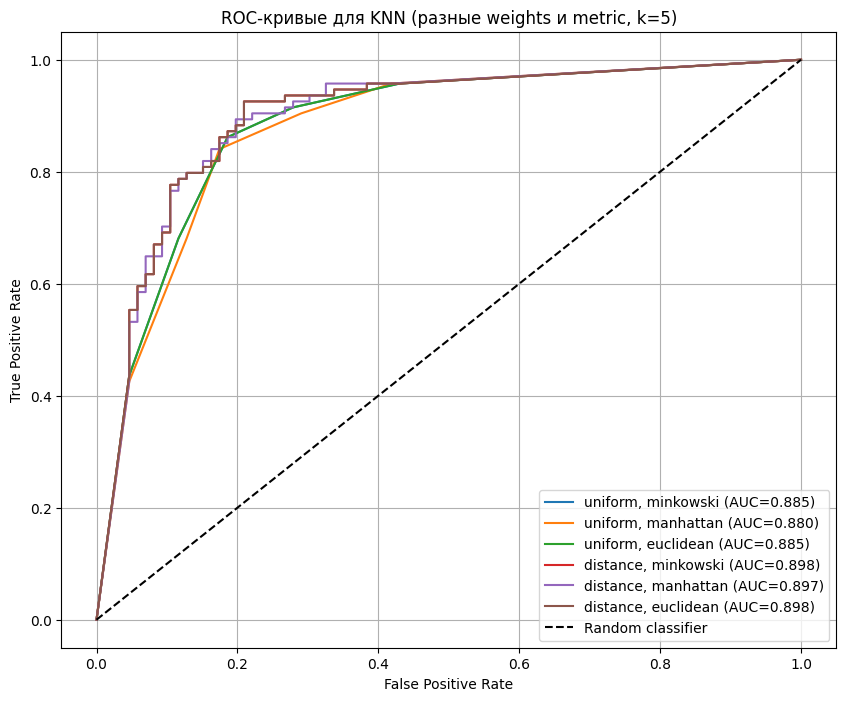

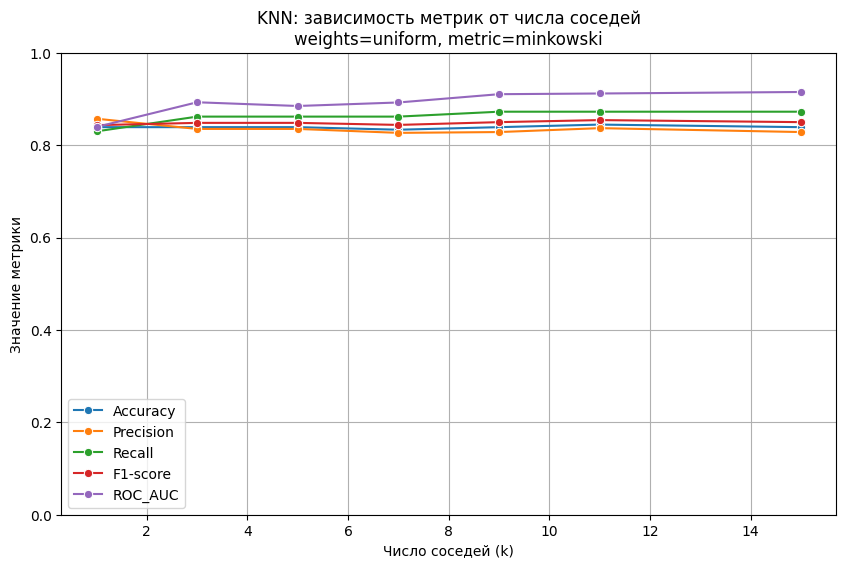

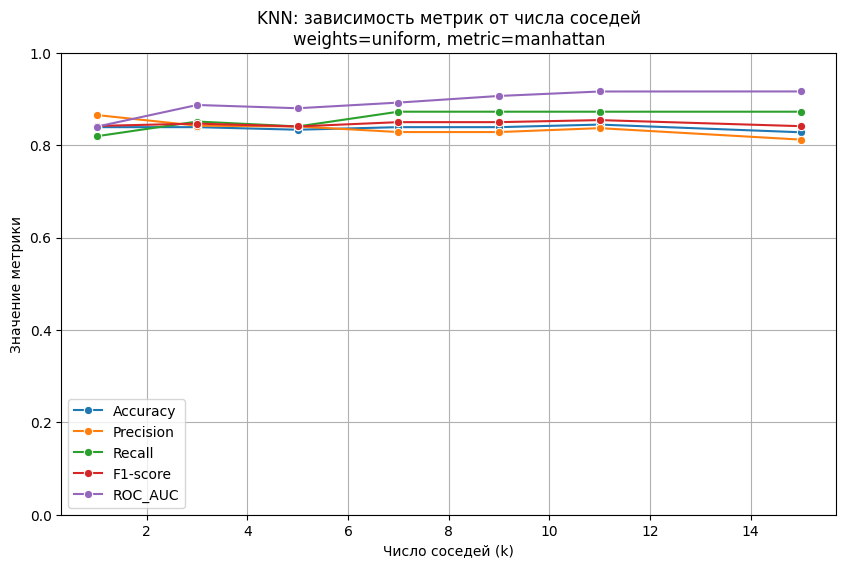

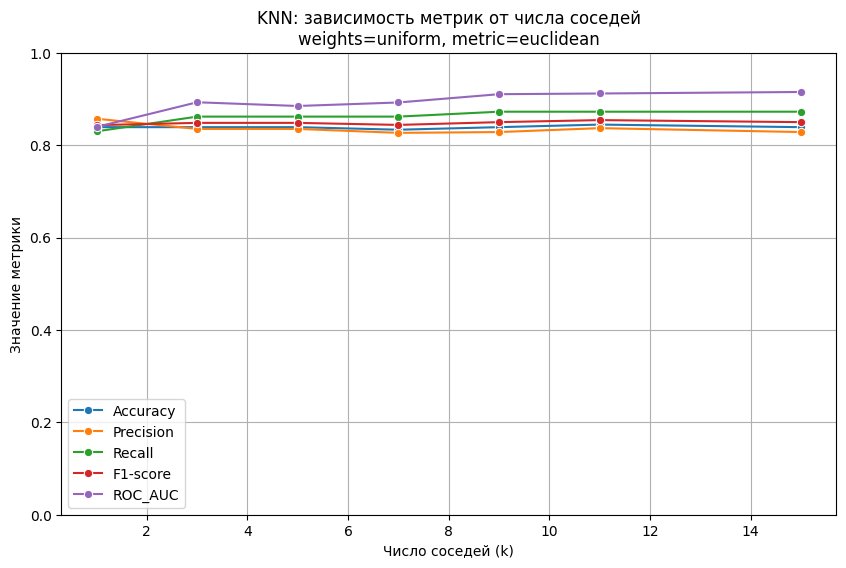

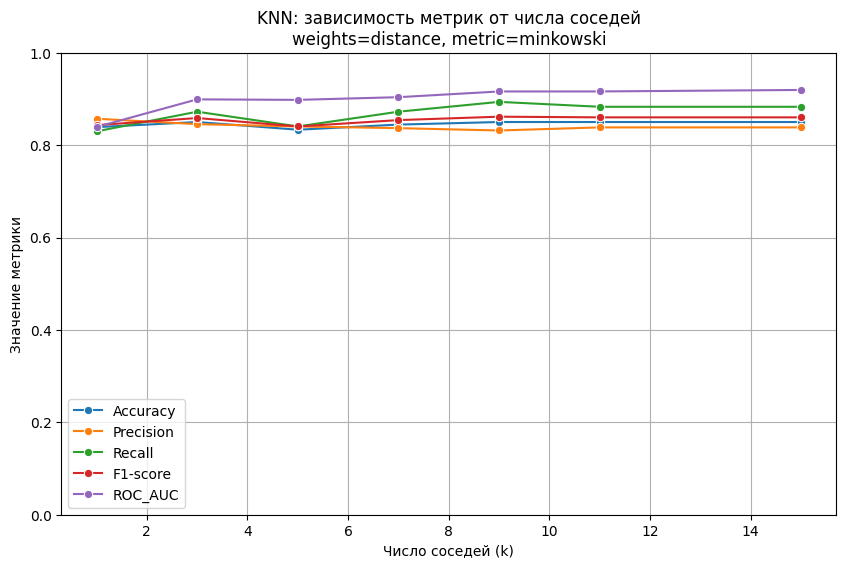

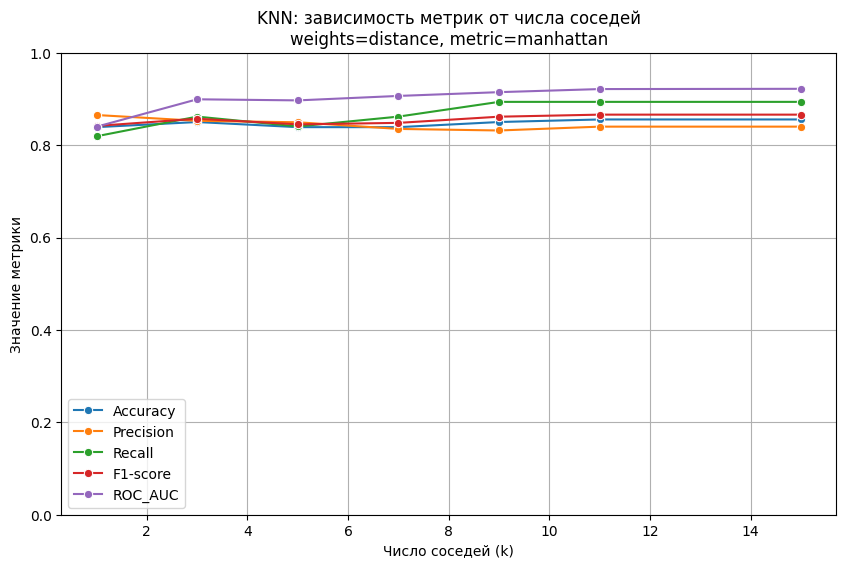

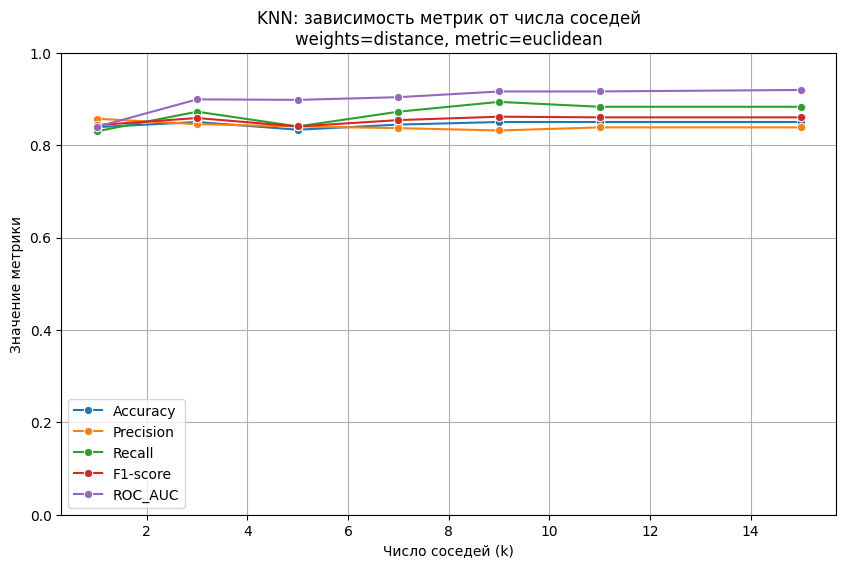

n_neighbors   weights     metric  Accuracy  Precision    Recall  F1-score  \
41           15  distance  euclidean  0.850000   0.838384  0.882979  0.860104   
34           15  distance  manhattan  0.855556   0.840000  0.893617  0.865979   
27           15  distance  minkowski  0.850000   0.838384  0.882979  0.860104   
20           15   uniform  euclidean  0.838889   0.828283  0.872340  0.849741   
13           15   uniform  manhattan  0.827778   0.811881  0.872340  0.841026   
6            15   uniform  minkowski  0.838889   0.828283  0.872340  0.849741   

     ROC_AUC  
41  0.919409  
34  0.921883  
27  0.919409  
20  0.915017  
13  0.916192  
6   0.915017

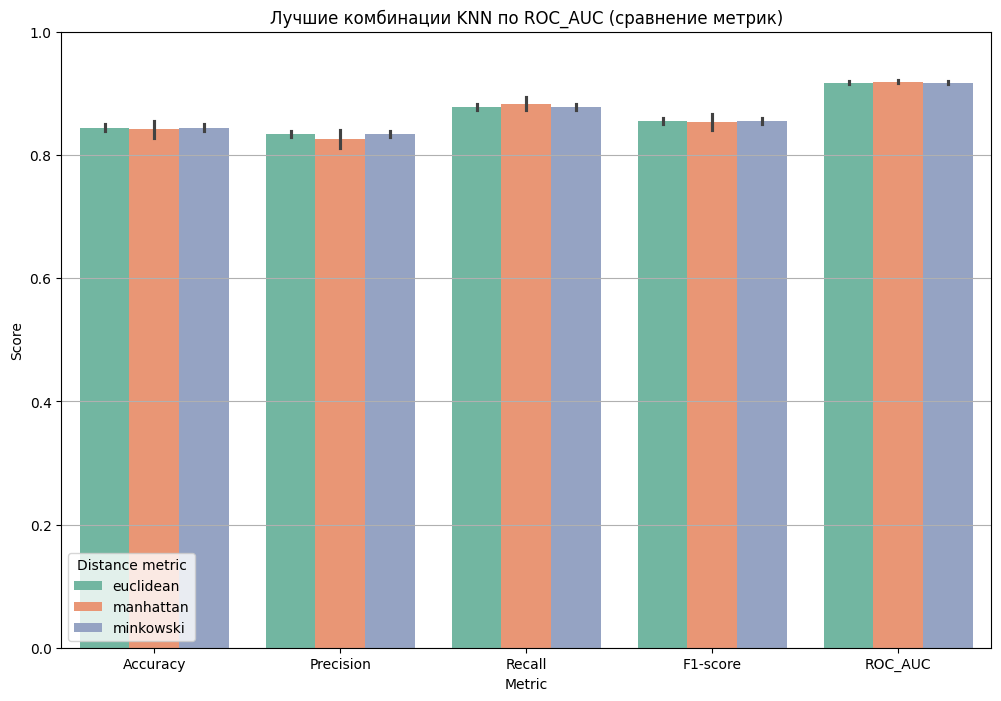

Лучшие параметры: k=15, weights=distance, metric=manhattan, ROC_AUC=0.922


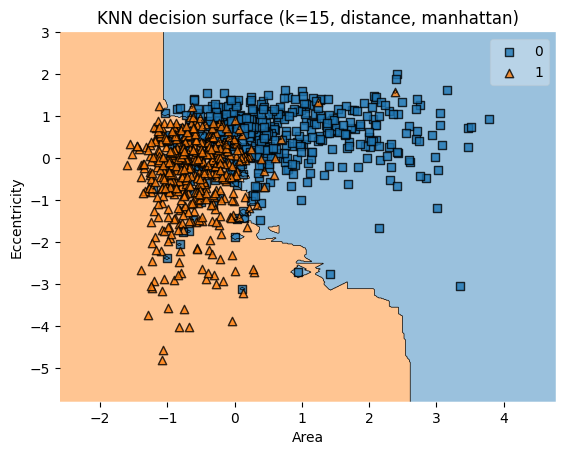

In [212]:
neighbors_values = [1, 3, 5, 7, 9, 11, 15]
weights_values = ['uniform', 'distance']
metric_values = ['minkowski', 'manhattan', 'euclidean']

# --- Список для результатов ---
results = []

# --- Перебор всех комбинаций гиперпараметров ---
for w in weights_values:
    for m in metric_values:
        for k in neighbors_values:
            try:
                clf = KNeighborsClassifier(n_neighbors=k, weights=w, metric=m)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                y_proba = clf.predict_proba(X_test)[:, 1]
                
                results.append({
                    'n_neighbors': k,
                    'weights': w,
                    'metric': m,
                    'Accuracy': accuracy_score(y_test, y_pred),
                    'Precision': precision_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
                    'Recall': recall_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
                    'F1-score': f1_score(y_test, y_pred, pos_label='Kecimen', zero_division=0),
                    'ROC_AUC': roc_auc_score(y_test, y_proba)
                })
            except Exception as e:
                print(f"Ошибка для k={k}, weights={w}, metric={m}: {e}")

# --- Таблица результатов ---
results_df = pd.DataFrame(results)
display(results_df)

# --- ROC-кривые для разных комбинаций ---
plt.figure(figsize=(10, 8))
for w in weights_values:
    for m in metric_values:
        clf = KNeighborsClassifier(n_neighbors=5, weights=w, metric=m)
        clf.fit(X_train, y_train)
        y_proba = clf.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba, pos_label='Kecimen')
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{w}, {m} (AUC={roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')
plt.title('ROC-кривые для KNN (разные weights и metric, k=5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# --- Линейные графики метрик от числа соседей ---
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-score", "ROC_AUC"]

for w in weights_values:
    for m in metric_values:
        subset = results_df[(results_df['weights'] == w) & (results_df['metric'] == m)]
        plt.figure(figsize=(10, 6))
        for metric in metrics_to_plot:
            sns.lineplot(data=subset, x="n_neighbors", y=metric, marker="o", label=metric)
        plt.title(f"KNN: зависимость метрик от числа соседей\nweights={w}, metric={m}")
        plt.xlabel("Число соседей (k)")
        plt.ylabel("Значение метрики")
        plt.ylim(0, 1)
        plt.legend()
        plt.grid(True)
        plt.show()

# --- Сводная таблица по лучшим параметрам ---
best_params = results_df.loc[results_df.groupby(['weights', 'metric'])['ROC_AUC'].idxmax()]
display(best_params)

# --- Столбчатая диаграмма для лучших моделей ---
plt.figure(figsize=(12, 8))
sns.barplot(
    data=best_params.melt(id_vars=['weights', 'metric', 'n_neighbors'], 
                          value_vars=metrics_to_plot, 
                          var_name='Metric', value_name='Score'),
    x='Metric', y='Score', hue='metric', 
    palette='Set2'
)
plt.title('Лучшие комбинации KNN по ROC_AUC (сравнение метрик)')
plt.ylim(0, 1)
plt.legend(title='Distance metric')
plt.grid(axis='y')
plt.show()

# --- Граница решений для лучшего сочетания ---
best_row = results_df.loc[results_df['ROC_AUC'].idxmax()]
best_k = int(best_row['n_neighbors'])
best_w = best_row['weights']
best_m = best_row['metric']

print(f"Лучшие параметры: k={best_k}, weights={best_w}, metric={best_m}, ROC_AUC={best_row['ROC_AUC']:.3f}")

best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_w, metric=best_m)
best_knn.fit(X_train, y_train)

feature_indexes = [0, 1]
title1 = f'KNN decision surface (k={best_k}, {best_w}, {best_m})'
decision_boundary_plot(X, y, X_train, y_train, best_knn, feature_indexes, title1)

### Сравнительный анализ влияния гиперпараметров


| Метод | Лучшие параметры | Accuracy | ROC-AUC | Ключевые инсайты |
|-------|------------------|----------|---------|------------------|
| **GaussianNB** | `var_smoothing=1e-12` | 0.822 | 0.914 | Стабильность к параметрам, хорошее соответствие гауссовскому распределению |
| **MultinomialNB** | `alpha=1.0-5.0` | 0.850 | 0.911 | Умеренное сглаживание оптимально для дискретных признаков |
| **ComplementNB** | `alpha=0.1-2.0` | 0.839 | 0.911 | Сбалансированность классов, высокий recall для Besni |
| **BernoulliNB** | `binarize=0.3` | 0.822 | 0.824 | Высокая чувствительность к порогу бинаризации |
| **Decision Tree** | `entropy, max_depth=6` | 0.856 | 0.896 | Оптимальная глубина 4-6, entropy > gini |
| **KNN** | `distance, manhattan, n=15` | 0.856 | 0.922 | Веса по расстоянию + метрика Манхэттена оптимальны |
| **LDA** | `solver=svd` | 0.850 | 0.922 | Стабильность, лучший ROC-AUC, линейная разделимость |
| **SVM** | `linear, C=0.1` | 0.867 | 0.922 | Линейное ядро оптимально, малые C улучшают обобщение |


#### **Наивные Байесовские методы**

| Параметр | Влияние | Оптимальное значение | Интерпретация |
|----------|---------|---------------------|---------------|
| `var_smoothing` (GaussianNB) | Минимальное | 1e-12 | Данные хорошо соответствуют распределению |
| `alpha` (MultinomialNB) | Умеренное | 1.0-5.0 | Баланс сглаживания и сохранения информации |
| `alpha` (ComplementNB) | Слабое | 0.1-2.0 | Стабильность к сглаживанию |
| `binarize` (BernoulliNB) | Критическое | 0.3 | Сильная зависимость от порога бинаризации |

#### **Дерево решений**

| Параметр | Влияние | Оптимальное значение | Интерпретация |
|----------|---------|---------------------|---------------|
| `max_depth` | Сильное | 4-6 | Баланс сложности и обобщения |
| `criterion` | Умеренное | entropy | Лучшее разделение чем gini |
| Глубина > 8 | Отрицательное | - | Переобучение |

#### **KNN**

| Параметр | Влияние | Оптимальное значение | Интерпретация |
|----------|---------|---------------------|---------------|
| `n_neighbors` | Сильное | 11-15 | Баланс локальности и стабильности |
| `weights` | Значительное | distance | Учет расстояния улучшает качество |
| `metric` | Умеренное | manhattan | Независимость признаков |
| `n_neighbors=1` | Отрицательное | - | Переобучение |

#### **SVM и LDA**

| Метод | Параметр | Влияние | Оптимальное значение |
|-------|----------|---------|---------------------|
| **SVM** | `kernel` | Критическое | rbf |
| **SVM** | `C` | Умеренное | 0.1 |
| **SVM** | `gamma` | Минимальное | scale/auto |
| **LDA** | `solver` | Минимальное | svd |
| **LDA** | `shrinkage` | Слабое | None/auto |